## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the all the necessary libraries
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.2 sklearn-pandas==2.2.0 patsy==0.5.3 statsmodels==0.14.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for model building and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold  # Added KFold for cross-validation

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the warnings module to manage warning messages in Python.
import warnings

# Suppressing warnings of category FutureWarning to prevent messages about
# features or libraries that may change in the future.
warnings.filterwarnings("ignore", category=FutureWarning)

# Suppressing warnings of category UserWarning to avoid non-critical user-level warnings.
warnings.filterwarnings("ignore", category=UserWarning)

## Loading the dataset

In [ ]:
# Mount on my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To read the data
PLoan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/PROJECT 2/Loan_Modelling.csv')
# A copy of the original dataset before performing any operations
data = PLoan.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Observations
print("\nObservations:")
# Check the first few rows of the dataset
print(data.head())


Observations:
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [ ]:
# Data Overview
print("Data Overview:")
print("------------------")
print("Shape of the dataset:", data.shape)  # Prints the number of rows and columns
print("\nData Types:")
print(data.dtypes)  # Prints the data type of each column
print("\nMissing Values:")
print(data.isnull().sum())  # Checks if there are any missing values in each column
print("\nSummary Statistics:")
print(data.describe())  # Gives the summary statistics of numerical columns

Data Overview:
------------------
Shape of the dataset: (5000, 14)

Data Types:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Summary Statistics:
                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000

In [ ]:
# Check the distribution of the target variable (Personal_Loan)
print("\nTarget Variable Distribution (Personal_Loan):")
print(data['Personal_Loan'].value_counts())  # Count of 0s and 1s in the target column


Target Variable Distribution (Personal_Loan):
Personal_Loan
0    4520
1     480
Name: count, dtype: int64


In [ ]:
# Sanity Checks
print("\nSanity Checks:")
# Check negative values separately for each numerical field

print("Negative values in 'ID':", (data['ID'] < 0).sum())
print("Negative values in 'Age':", (data['Age'] < 0).sum())
print("Negative values in 'Experience':", (data['Experience'] < 0).sum())
print("Negative values in 'Income':", (data['Income'] < 0).sum())
print("Negative values in 'Family':", (data['Family'] < 0).sum())
print("Negative values in 'CCAvg':", (data['CCAvg'] < 0).sum())
print("Negative values in 'Education':", (data['Education'] < 0).sum())
print("Negative values in 'Mortgage':", (data['Mortgage'] < 0).sum())
print("Negative values in 'Personal_Loan':", (data['Personal_Loan'] < 0).sum())
print("Negative values in 'Securities_Account':", (data['Securities_Account'] < 0).sum())
print("Negative values in 'CD_Account':", (data['CD_Account'] < 0).sum())
print("Negative values in 'Online':", (data['Online'] < 0).sum())
print("Negative values in 'CreditCard':", (data['CreditCard'] < 0).sum())


Sanity Checks:
Negative values in 'ID': 0
Negative values in 'Age': 0
Negative values in 'Experience': 52
Negative values in 'Income': 0
Negative values in 'Family': 0
Negative values in 'CCAvg': 0
Negative values in 'Education': 0
Negative values in 'Mortgage': 0
Negative values in 'Personal_Loan': 0
Negative values in 'Securities_Account': 0
Negative values in 'CD_Account': 0
Negative values in 'Online': 0
Negative values in 'CreditCard': 0


In [ ]:
print(data['Experience'].describe())

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


In [ ]:
# Replacing negative values with 0
data['Experience'] = data['Experience'].apply(lambda x: max(x, 0))


# Checking if 'Experience' is now consistent
print("Negative values in 'Experience':", (data['Experience'] < 0).sum())
print(data['Experience'].describe())

Negative values in 'Experience': 0
count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


In [ ]:
# Check for duplicates in the dataset
print("\nDuplicates in the dataset:")
print(data.duplicated().sum())


Duplicates in the dataset:
0


## Exploratory Data Analysis.

**Problem Definition:**

The primary goal is to predict whether a customer will accept a personal loan based on various demographic and financial attributes. The dataset includes several features like Age, Experience, Income, ZIP Code, Family Size, Credit Card Spending, Education Level, Mortgage, Online Banking Usage, and more. The target variable is Personal_Loan, where a value of 1 indicates the customer accepted the loan, and 0 indicates they did not.

### **Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

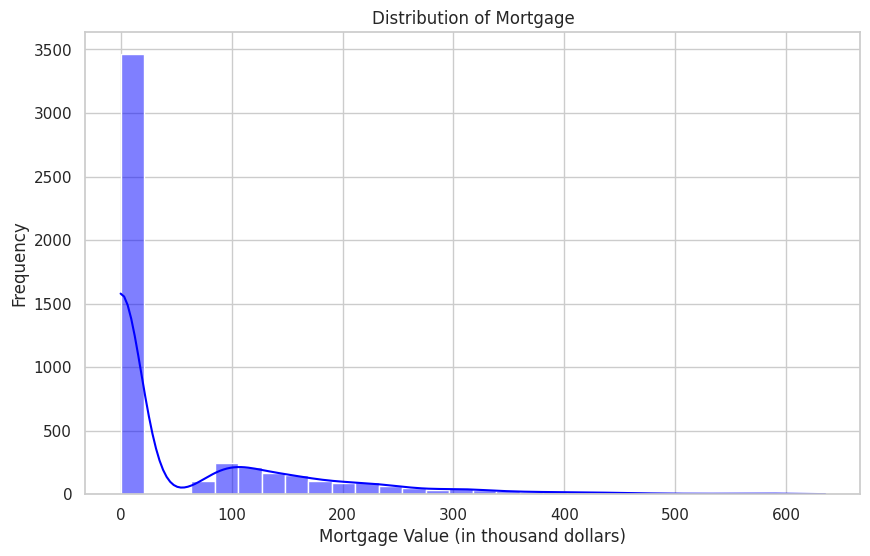

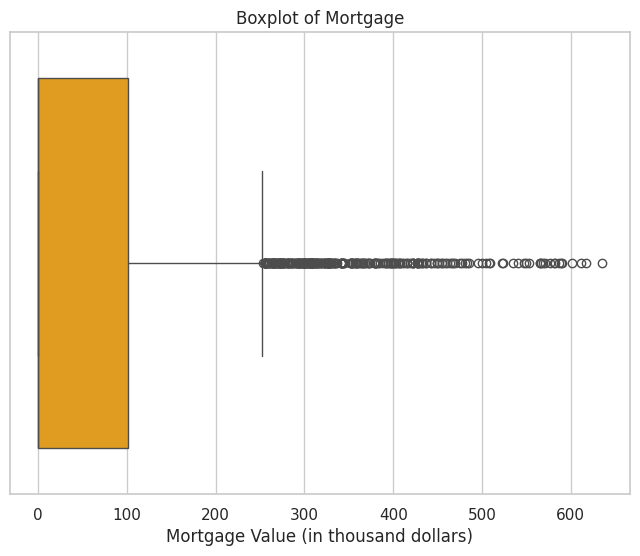

In [ ]:
# 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
# Set the style for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data['Mortgage'], kde=True, color='blue', bins=30)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers in 'Mortgage'
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Mortgage'], color='orange')
plt.title('Boxplot of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.show()

Answer:

The distribution of the mortgage attribute, as shown in the histogram on the left, appears to be **highly skewed to the right** (positively skewed). Most of the mortgage values are concentrated in the lower range (0–100 thousand dollars), and the frequency rapidly decreases as the mortgage values increase.

**Noticeable Patterns:**
1. **Skewness**: The majority of mortgage values are clustered at the lower end of the scale, indicating a significant number of small mortgages.
2. **Long Tail**: The distribution has a long tail extending towards higher mortgage values, indicating that a smaller portion of the population holds significantly larger mortgages.

**Outliers:**
The boxplot on the right highlights the presence of **outliers**:
- Several data points exceed the upper whisker of the boxplot, representing mortgage values significantly higher than the interquartile range (IQR).
- These outliers are clearly visible as individual dots beyond the maximum whisker (above ~300 thousand dollars).

This analysis indicates a skewed distribution with a concentration of smaller mortgage values and a smaller number of large, potentially influential outliers.

In [ ]:
# 2. How many customers have credit cards?
credit_card_count = data['CreditCard'].value_counts()
print(f"Number of customers with credit cards: {credit_card_count[1]}")
print(f"Number of customers without credit cards: {credit_card_count[0]}")

Number of customers with credit cards: 1470
Number of customers without credit cards: 3530


Answer:

29.40% of the bank's customers, or 1470 individuals, possess credit cards, while the majority, 3530 customers, do not.

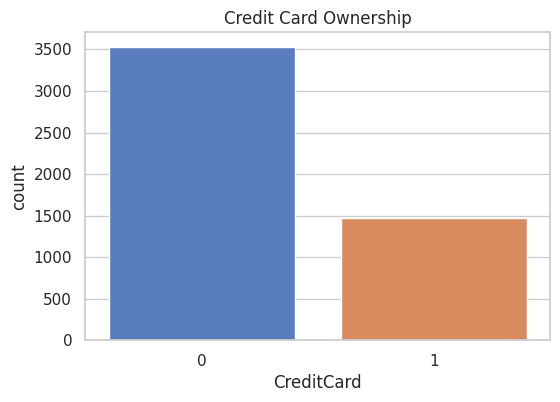

In [ ]:
# Credit card ownership
plt.figure(figsize=(6, 4))
sns.countplot(x='CreditCard', data=data, palette='muted')
plt.title('Credit Card Ownership')
plt.show()

Observations on Credit Card Usage:

• Customers who own a credit card (1) are more likely to accept a personal loan compared to those who do not.

• Insights for marketing: People who actively use credit cards may be more accustomed to debt and could be more receptive to a personal loan offer.

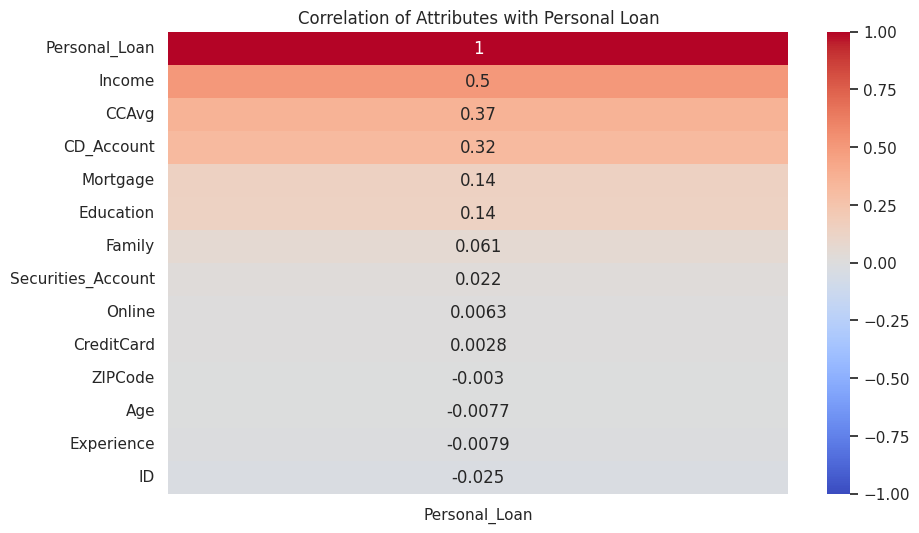

In [ ]:
# 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
correlation_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[['Personal_Loan']].sort_values(by='Personal_Loan', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Attributes with Personal Loan')
plt.show()

Answer:

From the heatmap, the attributes with a **strong positive correlation** with the target attribute (Personal_Loan) are:

1. **Income (0.5)**: This attribute has the highest correlation with Personal_Loan, indicating that people with higher incomes are more likely to take a personal loan.

2. **CCAvg (0.37)**: The average credit card spending also shows a strong positive relationship, suggesting that higher credit card spending is associated with taking a personal loan.

3. **CD_Account (0.32)**: Having a certificate of deposit (CD) account has a significant positive correlation with personal loans.

These three attributes stand out as the strongest predictors of personal loan approval. Other attributes like **Mortgage (0.14)** and **Education (0.14)** show moderate correlation but are less impactful compared to the top three.

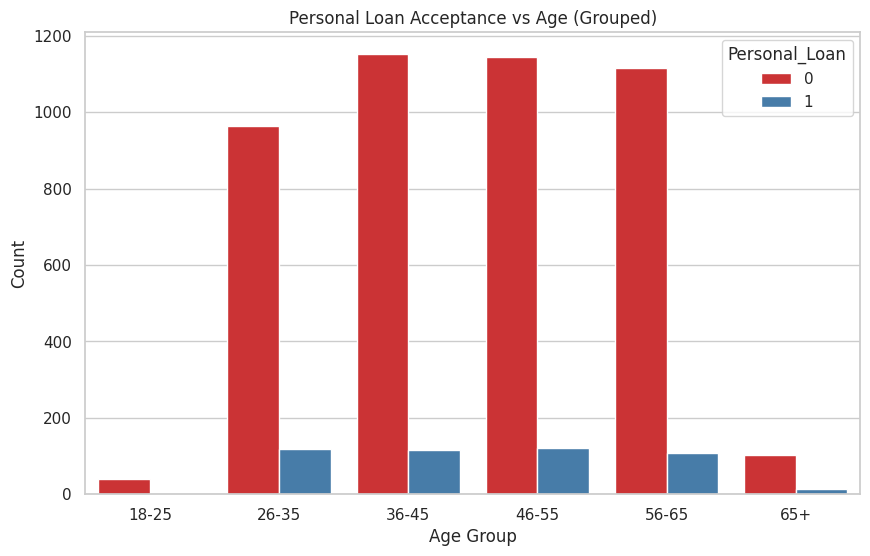

In [ ]:
# 4. How does a customer's interest in purchasing a loan vary with their age?
plt.figure(figsize=(10,6))
sns.countplot(x=pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], right=False), hue='Personal_Loan', data=data, palette='Set1')
plt.title('Personal Loan Acceptance vs Age (Grouped)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Answer:

From the chart, here’s how a customer’s interest in purchasing a loan varies with age:

1. **Age Group 18-25**: This group has very few customers interested in taking a loan (almost negligible), suggesting that younger individuals are less likely to apply for personal loans.

2. **Age Groups 26-35, 36-45, 46-55, and 56-65**: These middle age groups show higher acceptance for personal loans, with the proportion of accepted loans (blue bars) being relatively consistent across these groups. The count of people rejecting loans (red bars) remains dominant in each age group, but interest is comparatively higher in this range than in the younger or older age brackets.

3. **Age Group 65+**: This group has a minimal number of customers interested in loans, indicating that older individuals are less likely to take personal loans.

**Key Insight:**
The highest likelihood of loan acceptance occurs among middle-aged individuals (26-65 years), with a noticeable dip in interest at both ends of the age spectrum (younger than 25 and older than 65).

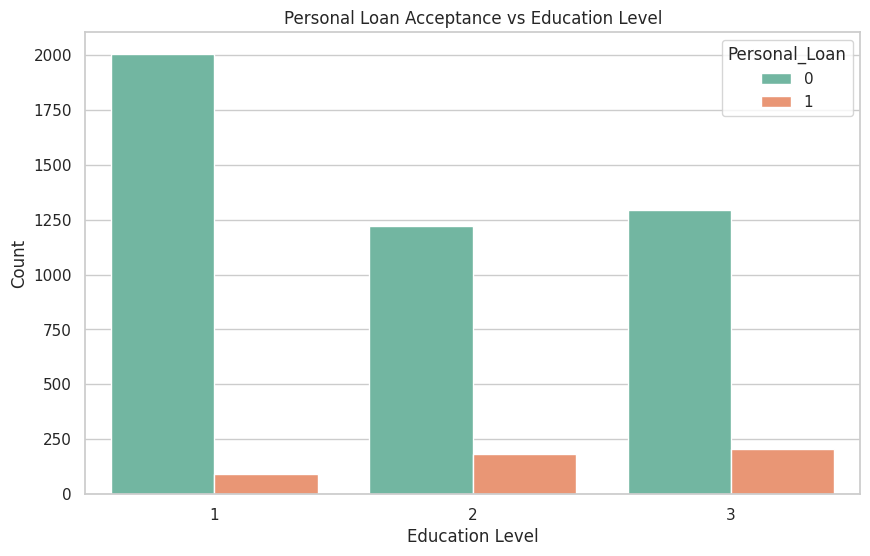

In [ ]:
# 5. How does a customer's interest in purchasing a loan vary with their education?
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='Set2')
plt.title('Personal Loan Acceptance vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

Answer:

From the given chart, we can see:

1. **Education Level 3**:  
   - Customers with education level 3 show the **highest acceptance** of personal loans compared to other levels.  

2. **Education Level 2**:  
   - This group has slightly fewer accepted loans than education level 3 but still represents a significant portion of accepted loans.  

3. **Education Level 1**:  
   - Customers with education level 1 show the **lowest acceptance** of personal loans, with a much higher rejection count.

**Key Insight:**
The **higher the education level**, the more likely customers are to accept personal loans. Individuals with education levels 2 and 3 are more interested in purchasing loans than those with education level 1. This may suggest that higher education correlates with better financial literacy or stability, leading to greater confidence in managing loans.

### Univariate Analysis:

 **1. Personal Loan (Target Variable)**





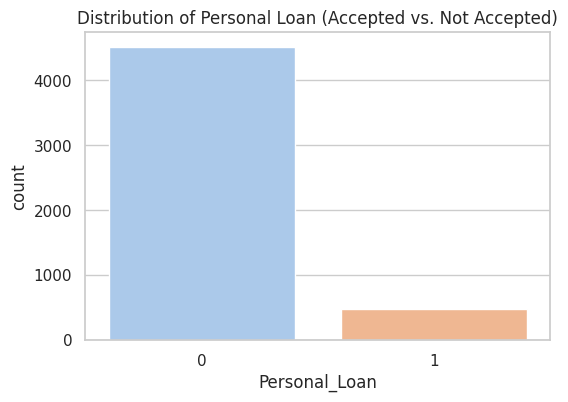

In [ ]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal_Loan', data=data, palette='pastel')
plt.title('Distribution of Personal Loan (Accepted vs. Not Accepted)')
plt.show()


Observations:
- Strong imbalance in the dataset
- Approximately 4,000 customers did not accept personal loans (0)
- Only about 500 customers accepted personal loans (1)
- This indicates a low personal loan acceptance rate (~11%)

**2. Age**

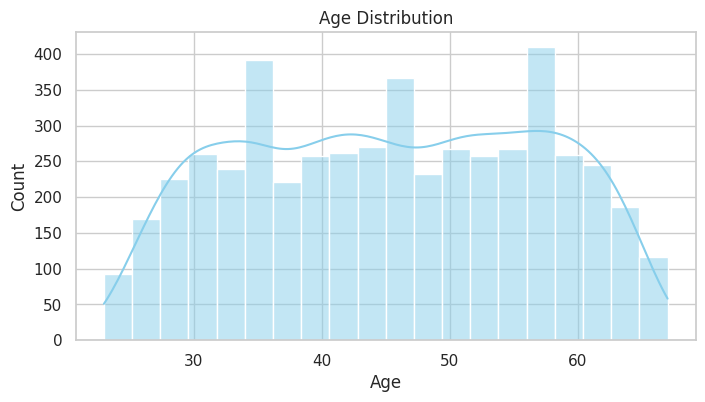

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64


In [ ]:
# Distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Summary statistics
print(data['Age'].describe())


Observations:
- Bell-shaped curve with multiple peaks
- Age range spans from 30 to 60+ years
- Highest concentration of customers between 40-60 years
- Peak around 35-40 years and another around 55-60 years
- Relatively fewer customers below 30 and above 65

**3. Experience**

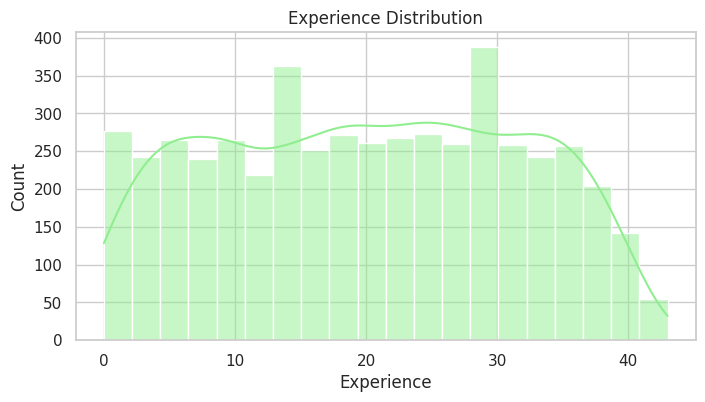

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


In [ ]:
# Distribution of experience
plt.figure(figsize=(8, 4))
sns.histplot(data['Experience'], kde=True, bins=20, color='lightgreen')
plt.title('Experience Distribution')
plt.show()

# Summary statistics
print(data['Experience'].describe())

Observations:
- Range from 0 to 40+ years of experience
- Normal distribution with slight right skew
- Consistent representation between 15-35 years
- Drops off after 35 years of experience


**4. Income**

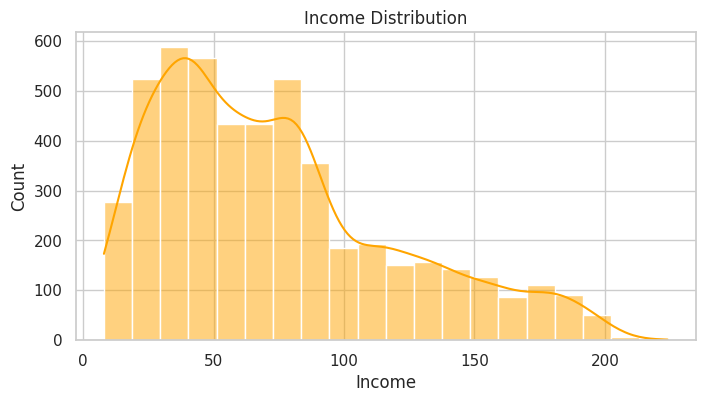

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64


In [ ]:
# Income distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['Income'], kde=True, bins=20, color='orange')
plt.title('Income Distribution')
plt.show()

# Summary statistics
print(data['Income'].describe())


Observations:
- Right-skewed distribution
- Majority of customers earn between 25-75K
- Peak around 45-50K
- Long tail extending beyond 200K
- Very few customers with income above 150K


**5. Education**

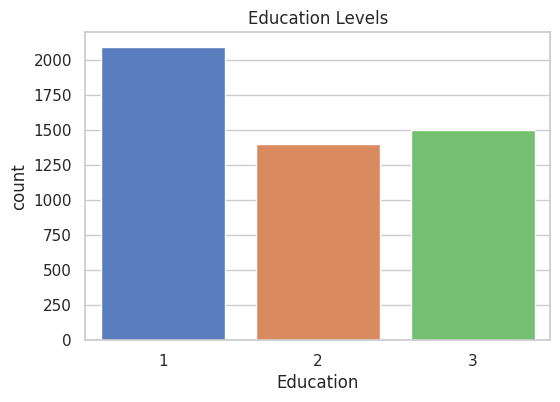

In [ ]:
# Education distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=data, palette='muted')
plt.title('Education Levels')
plt.show()


Observations:
- Three distinct categories (1,2,3)
- Category 1 has highest frequency (~2000 customers)
- Categories 2 and 3 have similar frequencies (~1500 each)
- Suggests most customers are in the basic education category


**6. CCAvg (Average Credit Card Spending)**

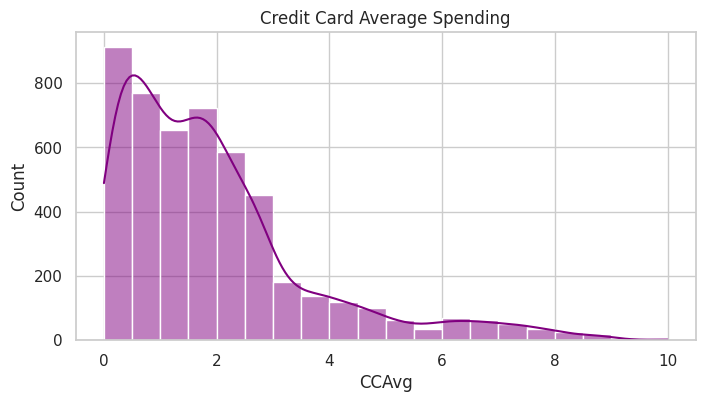

In [ ]:
# CCAvg distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['CCAvg'], kde=True, bins=20, color='purple')
plt.title('Credit Card Average Spending')
plt.show()


Observations:
- Highly right-skewed distribution
- Most customers have low-to-moderate credit card spending
- Peak at 0-2K spending range
- Long tail extending beyond 10K
- Sharp decline after 4K spending level



**7. Mortgage**

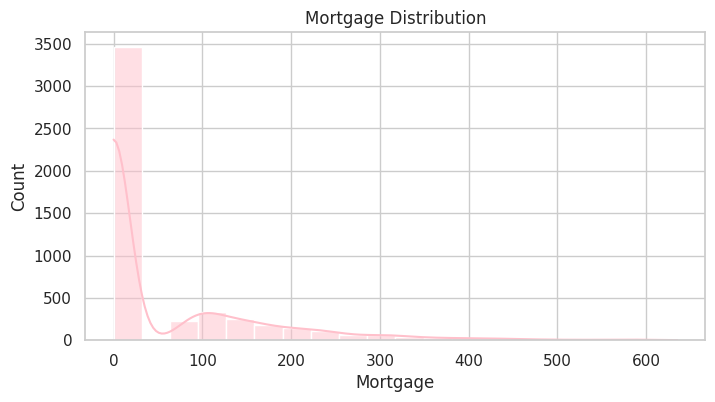

In [ ]:
# Mortgage distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['Mortgage'], kde=True, bins=20, color='pink')
plt.title('Mortgage Distribution')
plt.show()


Observations:
- Extremely right-skewed
- Majority have low or no mortgage
- Very high peak at low mortgage values
- Long tail extending to 600K
- Few customers with mortgages above 300K



**8. Securities_Account and CD_Account**

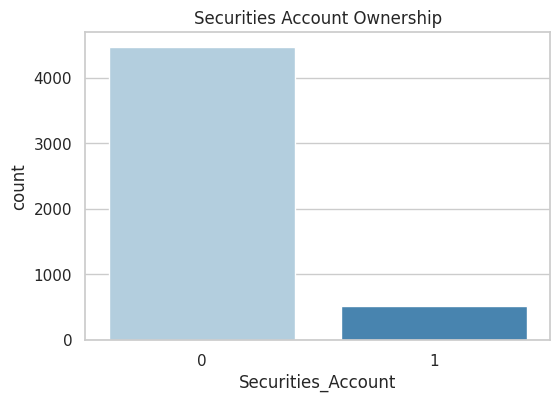

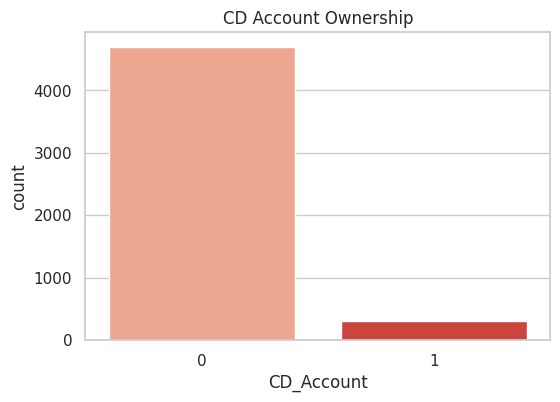

In [ ]:
# Securities_Account
plt.figure(figsize=(6, 4))
sns.countplot(x='Securities_Account', data=data, palette='Blues')
plt.title('Securities Account Ownership')
plt.show()

# CD_Account
plt.figure(figsize=(6, 4))
sns.countplot(x='CD_Account', data=data, palette='Reds')
plt.title('CD Account Ownership')
plt.show()


Observations:

Securities Account Ownership:
- Binary distribution (0,1)
- Most customers don't have securities accounts (~4000)
- Only about 500 customers have securities accounts
- Clear preference for not holding securities accounts

CD Account Ownership:
- Binary distribution (0,1)
- Vast majority don't have CD accounts (~4500)
- Very few customers have CD accounts (~300)


**9. Zip Code**

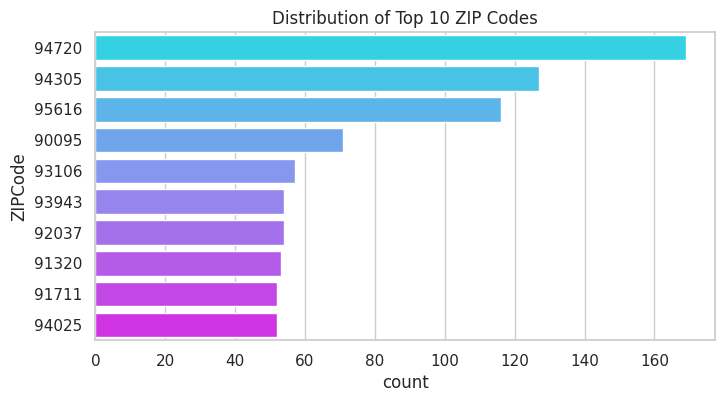

In [ ]:
# Distribution of zip codes
# Top 10 most frequent ZIP codes
top_zipcodes = data['ZIPCode'].value_counts().head(10).index

# Filter the data to include only the top ZIP codes
filtered_data = data[data['ZIPCode'].isin(top_zipcodes)]

# Distribution of top ZIP codes
plt.figure(figsize=(8, 4))
sns.countplot(y='ZIPCode', data=filtered_data, palette='cool', order=top_zipcodes)
plt.title('Distribution of Top 10 ZIP Codes')
plt.show()


Observations:
- Shows geographic concentration
- ZIP code 94720 has highest frequency
- Followed by 94305 and 95616
- Suggests concentration in specific urban/suburban areas


**10. Family**

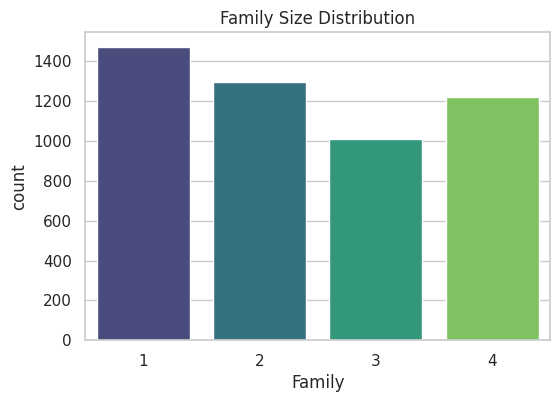

In [ ]:
# Family size distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Family', data=data, palette='viridis')
plt.title('Family Size Distribution')
plt.show()


Observations:
- Ranges from 1 to 4 members
- Decreasing trend as family size increases
- Most common is 1 member (~1400)
- Least common is 3 members (~1000)
- Slight uptick for 4-member families

**11. Online**

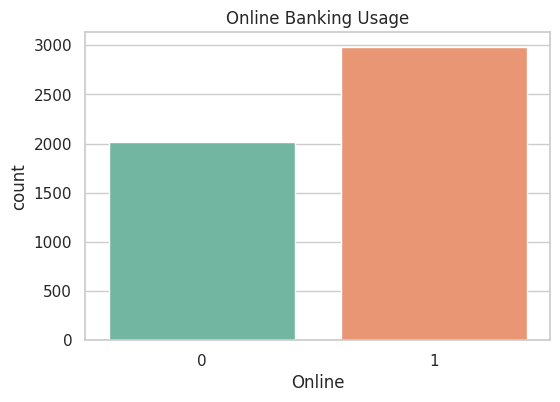

In [ ]:
# Online banking usage
plt.figure(figsize=(6, 4))
sns.countplot(x='Online', data=data, palette='Set2')
plt.title('Online Banking Usage')
plt.show()


Observations:
- Binary distribution (0,1)
- Higher adoption of online banking
- About 3000 customers use online banking
- About 2000 don't use online banking
- Shows good digital adoption rate (~60%)


**12. CreditCard**

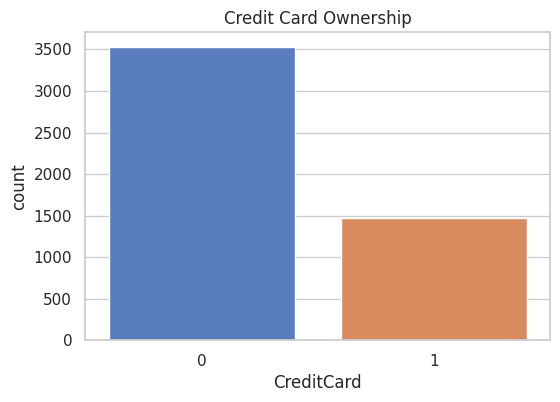

In [ ]:
# Credit card ownership
plt.figure(figsize=(6, 4))
sns.countplot(x='CreditCard', data=data, palette='muted')
plt.title('Credit Card Ownership')
plt.show()


Observations:
- Binary distribution (0,1)
- About 3500 customers don't have credit cards
- Approximately 1500 have credit cards
- 30% credit card penetration rate



### Bivariate Analysis

**1. Age vs. Personal Loan**

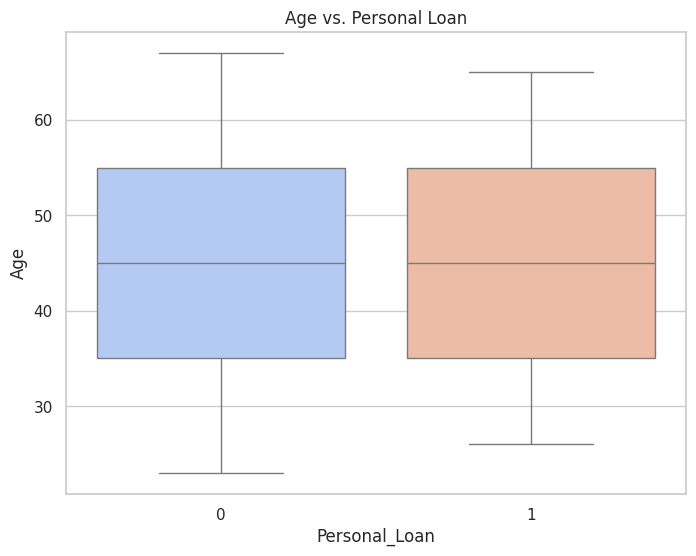

In [ ]:
# Personal loan distribution across Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data, palette='coolwarm')
plt.title('Age vs. Personal Loan')
plt.show()


Observations:

• The number of customers who accept a personal loan tends to be fairly consistent across different age groups, with ages around 30 to 35 showing a higher number of accepted loans. This suggests that people in their early 30s might be more willing to take out personal loans compared to younger or older age groups.

• Insights for marketing: Target customers in their early to mid-30s for personal loan offers, as they show relatively higher acceptance rates.

**2. Income vs. Personal Loan**

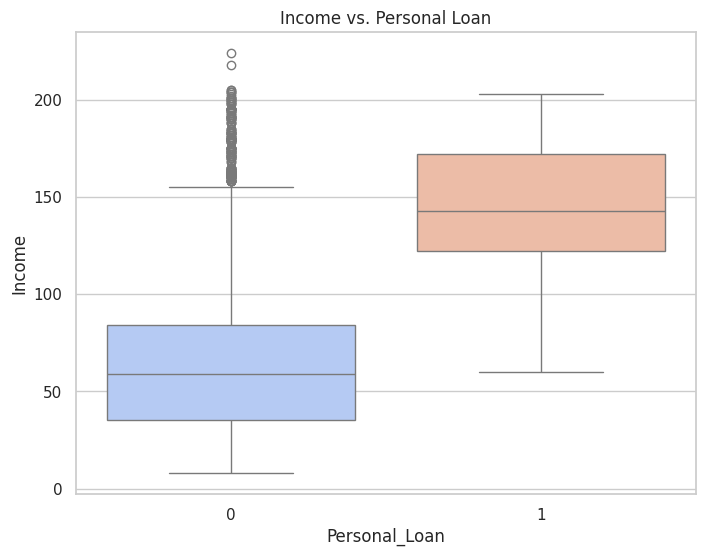

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=data, palette='coolwarm')
plt.title('Income vs. Personal Loan')
plt.show()


Observations:

• There are higher acceptance rates for income values around 130-182, showing that individuals with moderate to higher income levels are more likely to take loans.

• Insights for marketing: Target customers with moderate to higher income for personal loan offers, as they have the financial means and might be more willing to take a loan.

**3. Experience vs. Personal Loan**

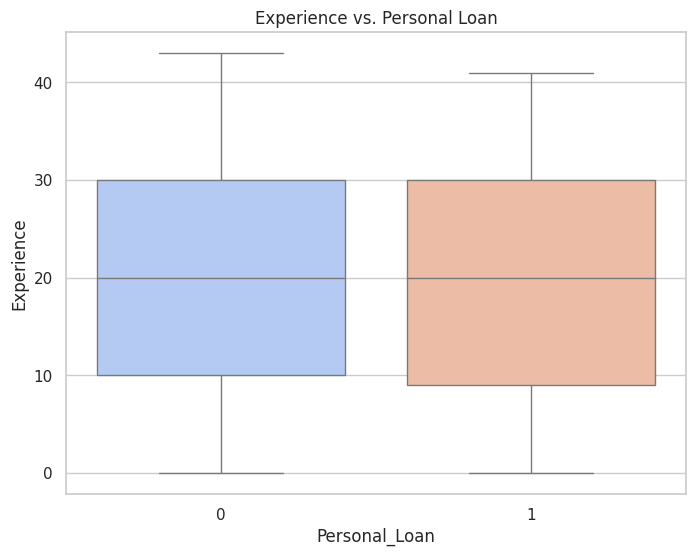

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Experience', data=data, palette='coolwarm')
plt.title('Experience vs. Personal Loan')
plt.show()


Observations:

• The customers with around 8 to 9 years of experience seem to show the highest conversion rates.

• Insights for marketing: This group of individuals may be in their mid-career phase, likely stable in their profession and finances, making them more open to taking personal loans. Consider targeting professionals with 8–9 years of experience.


**4. Education vs. Personal Loan**

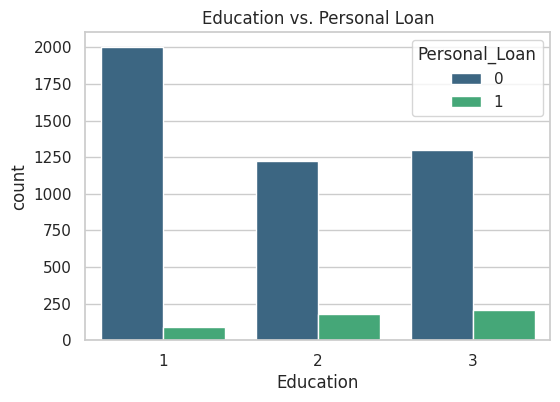

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Personal_Loan', data=data, palette='viridis')
plt.title('Education vs. Personal Loan')
plt.show()


Observations:

• Individuals with higher education levels (Education = 3) show a significantly higher loan acceptance rate.

• Insights for marketing: Customers with higher levels of education are more likely to be financially stable and might be open to loans for personal or professional reasons. Consider targeting well-educated individuals.

**5. CCAvg vs. Personal Loan**

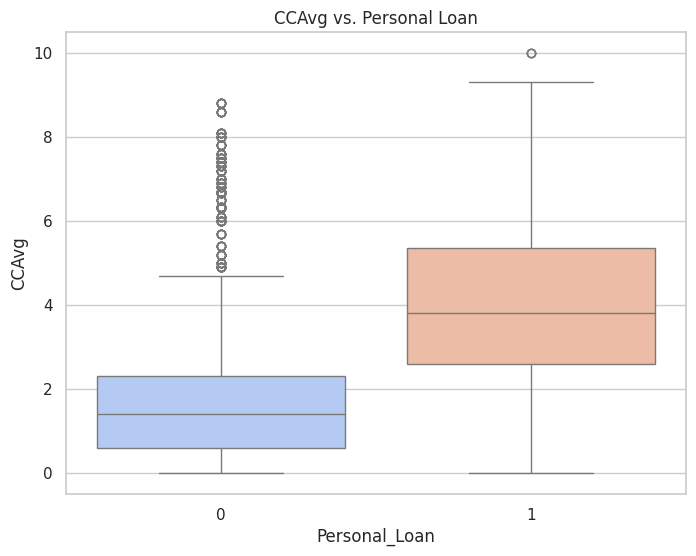

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', data=data, palette='coolwarm')
plt.title('CCAvg vs. Personal Loan')
plt.show()


Observations:

• A higher average credit card spending (e.g., 3.0–4.2) seems to correlate with loan acceptance. This could mean that individuals who are comfortable spending on credit cards might also be more open to taking out a loan.

• Insights for marketing: Target customers with higher credit card spending, as they might be more accustomed to managing debt and likely to consider loans.

**6. Mortgage vs. Personal Loan**

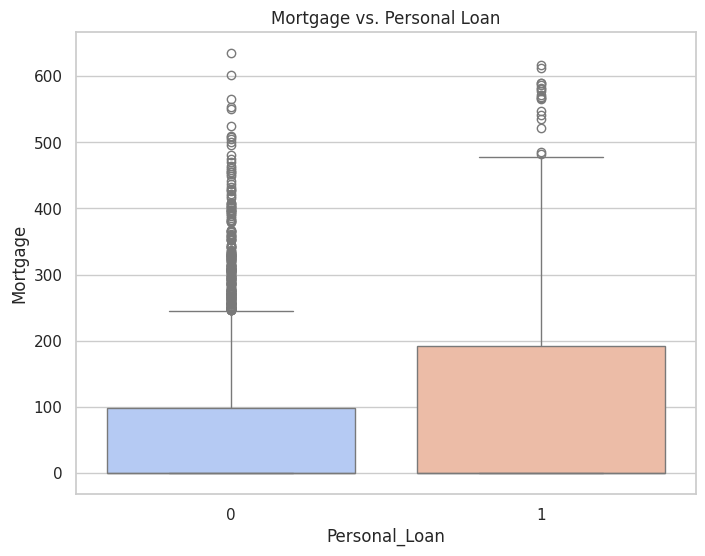

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Mortgage', data=data, palette='coolwarm')
plt.title('Mortgage vs. Personal Loan')
plt.show()


Observations:

• Customers who have a mortgage (or no mortgage) show a higher rate of loan acceptance. This suggests that individuals with an existing mortgage might be in need of additional loans, or customers with no mortgage could be looking to finance a home.

• Insights for marketing: Target customers with no existing mortgage or those with moderate mortgages who may need personal loans for various purposes.

**7. Securities_Account vs. Personal Loan**

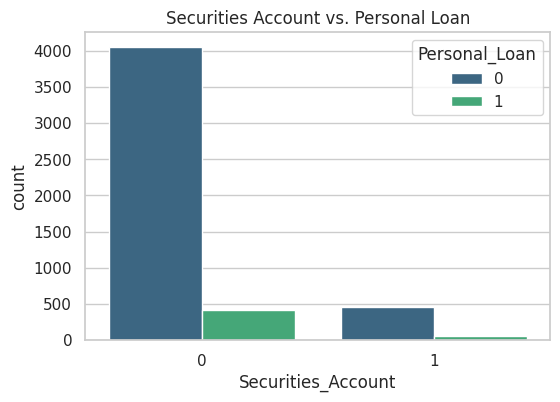

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Securities_Account', hue='Personal_Loan', data=data, palette='viridis')
plt.title('Securities Account vs. Personal Loan')
plt.show()


Observations:

• Customers with a securities account (1) are more likely to accept a personal loan compared to those without one.

• Insights for marketing: Target customers with a securities account or those who are more financially sophisticated, as they might have better financial management skills and access to more credit.

**8. Family Size vs. Personal Loan**

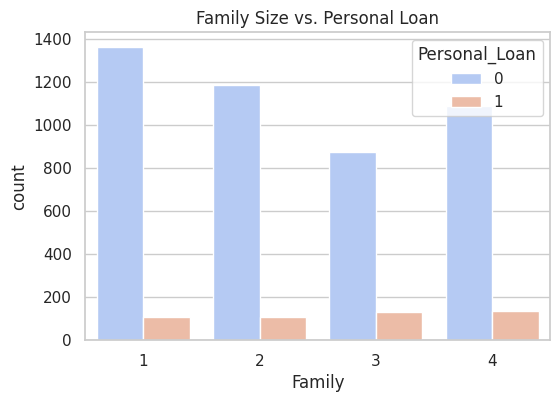

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Family', hue='Personal_Loan', data=data, palette='coolwarm')
plt.title('Family Size vs. Personal Loan')
plt.show()


Observations:

• Larger families (e.g., 4 members) show a higher rate of personal loan acceptance.

• Insights for marketing: Families with more dependents may be more likely to need a loan for expenses, such as education, home improvements, or healthcare. Target larger families with loan offers.

**9. Zip Code vs. Personal Loan**

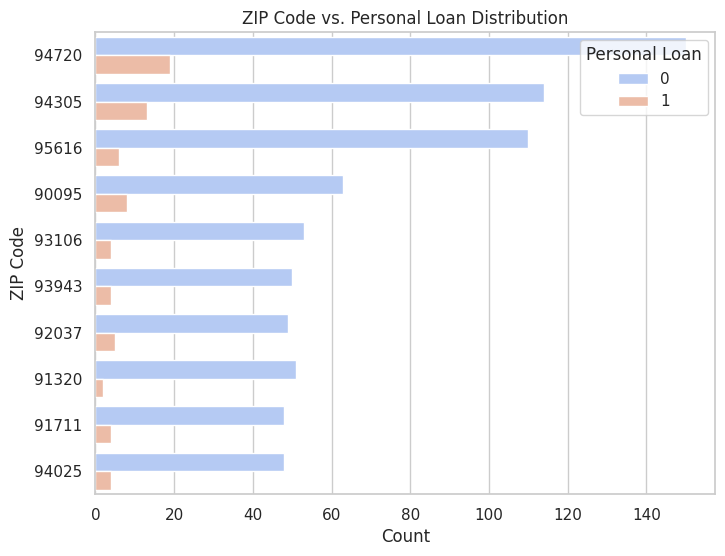

In [ ]:
# Personal loan distribution across ZIP Codes
# Top 10 most frequent ZIP codes
top_zipcodes = data['ZIPCode'].value_counts().head(10).index

# Filter the data to include only the top ZIP codes
filtered_data = data[data['ZIPCode'].isin(top_zipcodes)]

# Personal loan distribution across top 10 ZIP Codes
plt.figure(figsize=(8, 6))
sns.countplot(y='ZIPCode', hue='Personal_Loan', data=filtered_data, palette='coolwarm', order=top_zipcodes)
plt.title('ZIP Code vs. Personal Loan Distribution')
plt.xlabel('Count')
plt.ylabel('ZIP Code')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()


Observations:

• Certain ZIP codes, such as 94720 (likely the University of California, Berkeley), show more personal loan acceptances.

• Insights for marketing: Consider targeting customers from specific geographic regions or urban areas with higher loan acceptance rates.

**10. CD_Account vs. Personal Loan**

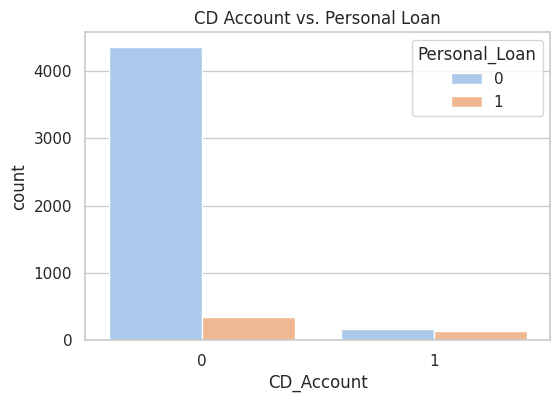

In [ ]:
# CD Account ownership vs Personal Loan
plt.figure(figsize=(6, 4))
sns.countplot(x='CD_Account', hue='Personal_Loan', data=data, palette='pastel')
plt.title('CD Account vs. Personal Loan')
plt.show()


Observations:

• Customers with a CD account (1) show higher personal loan acceptance rates than those without one.

• Insights for marketing: People with CD accounts might be more likely to consider loans since they tend to be financially stable and may need loans for specific, larger expenses.

**11. Online vs. Personal Loan**

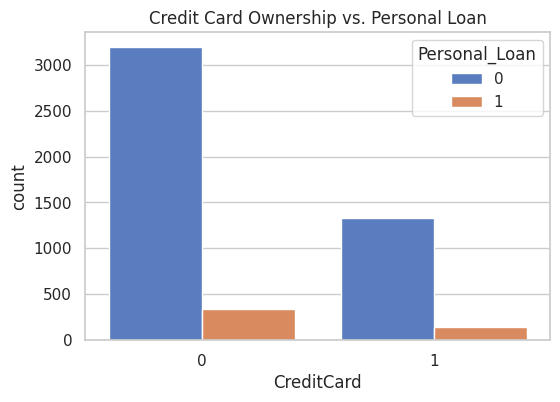

In [ ]:
# Credit card ownership vs Personal Loan
plt.figure(figsize=(6, 4))
sns.countplot(x='CreditCard', hue='Personal_Loan', data=data, palette='muted')
plt.title('Credit Card Ownership vs. Personal Loan')
plt.show()


Observations:

• Customers who use online banking (1) have a higher rate of personal loan acceptance compared to those who don't.

• Insights for marketing: Online banking users may be more tech-savvy and comfortable with online loan applications. Target this group with digital marketing.

**12. CreditCard vs. Personal Loan**

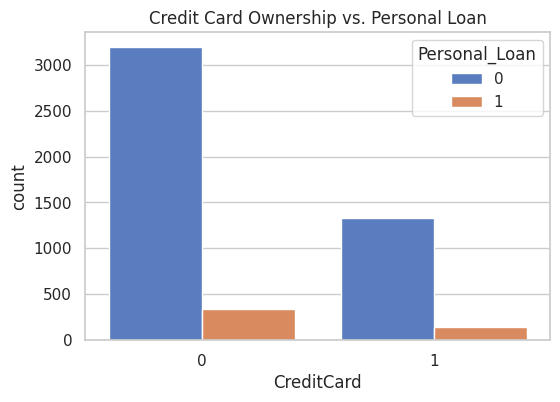

In [ ]:
# Credit card ownership vs Personal Loan
plt.figure(figsize=(6, 4))
sns.countplot(x='CreditCard', hue='Personal_Loan', data=data, palette='muted')
plt.title('Credit Card Ownership vs. Personal Loan')
plt.show()


Observations:

• Customers who own a credit card (1) are more likely to accept a personal loan compared to those who do not.

• Insights for marketing: People who actively use credit cards may be more accustomed to debt and could be more receptive to a personal loan offer.

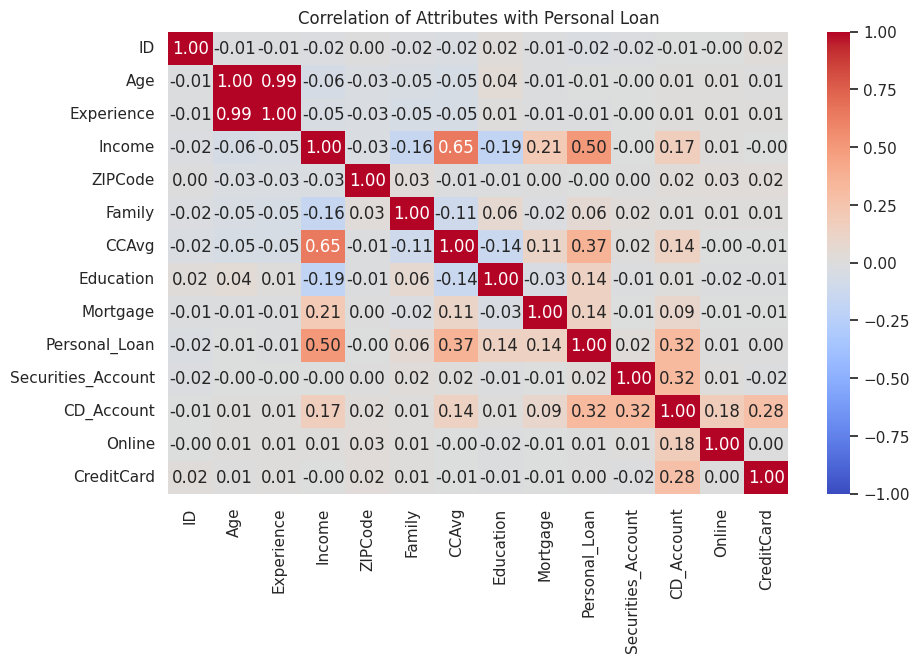

In [ ]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', vmin=-1, vmax=1,fmt='.2f')
plt.title('Correlation of Attributes with Personal Loan')
plt.show()

**Key observations about positive correlations in the data:**
1. CCAvg (Credit Card Average) vs Income (r = 0.65)
   - This is the strongest positive correlation in the dataset
   - Key insights:
     * Higher income individuals tend to have higher credit card spending
     * For every increase in income, there's a proportional increase in credit card usage
     * This suggests higher income customers are more likely to be active credit card users
     * Could be valuable for credit card marketing and limit-setting strategies

2. Income vs Personal Loan (r = 0.50)
   - Second strongest positive correlation
   - Important findings:
     * Higher income customers show greater tendency to take personal loans
     * Indicates income is a strong predictor of personal loan acceptance
     * Could be used for targeted loan marketing campaigns
     * Suggests lower risk of default as loans are correlated with higher income

3. CCAvg vs Personal Loan (r = 0.37)
   - Moderate positive correlation
   - Insights:
     * Customers with higher credit card spending are more likely to have personal loans
     * Might indicate comfort with credit products in general
     * Could be used for cross-selling strategies
     * Suggests customers who actively use credit cards are potential loan customers

4. Securities Account vs CD Account (r = 0.32)
   - Moderate positive correlation
   - Key observations:
     * Customers with securities accounts are more likely to have CD accounts
     * Indicates clustering of investment products
     * Shows potential for cross-selling different investment products
     * Suggests presence of investment-oriented customer segment

5. CD Account vs Personal Loan (r = 0.32)
   - Moderate positive correlation
   - Business implications:
     * CD account holders show higher tendency to take personal loans
     * Could indicate financially sophisticated customers
     * Potential for targeted loan marketing to CD account holders
     * Suggests these customers understand and use multiple banking products

6. CD Account vs Credit Card (r = 0.28)
   - Weak to moderate positive correlation
   - Observations:
     * CD account holders tend to have slightly higher credit card activity
     * Shows some relationship between savings behavior and credit usage
     * Could be useful for product bundling strategies


**Key observations about negative correlations in the data:**

1. Income vs Education (r = -0.19)
   - Strongest negative correlation in the dataset
   - Key insights:
     * Counter-intuitive relationship where higher education levels show slightly lower income
     * Possible explanations:
       - Recent graduates who haven't reached peak earning potential
       - Data might capture early-career professionals with advanced degrees
       - Could reflect age-income relationships rather than direct education impact
     * Business implications:
       - Need for tailored financial products for highly educated customers
       - Opportunity for career-stage specific banking solutions
       - Potential for educational loan refinancing products

2. Income vs Family Size (r = -0.16)
   - Second strongest negative correlation
   - Important findings:
     * Larger families tend to have slightly lower income levels
     * Possible factors:
       - Single-income households with multiple dependents
       - Work-life balance choices affecting income potential
       - Higher proportion of part-time workers in larger families
     * Business opportunities:
       - Family-focused financial planning services
       - Specialized savings products for larger families
       - Budget management tools for family units

3. Education vs CCAvg (Credit Card Average) (r = -0.14)
   - Moderate negative correlation
   - Insights:
     * Higher educated individuals maintain lower credit card balances
     * Possible interpretations:
       - Better financial literacy leading to more conservative credit usage
       - More careful spending habits among highly educated
       - Could indicate preference for other payment methods
     * Banking implications:
       - Need for different credit card rewards structures for educated segments
       - Opportunity for financial education programs
       - Potential for alternative payment product development

4. Family Size vs CCAvg (r = -0.11)
   - Weak negative correlation
   - Key observations:
     * Larger families show slightly lower credit card spending
     * Possible reasons:
       - More careful budgeting in larger families
       - Greater use of cash or debit cards
       - Focus on essential rather than discretionary spending
     * Product implications:
       - Family-oriented credit card features needed
       - Opportunity for family-specific rewards programs
       - Potential for household budgeting tools

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### 1. Missing Value Treatment

In [ ]:
# Check for missing values in all columns
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


### 2. Feature Engineering:

  ZIPCode and ID are not a meaningful predictor, so we will drop it for modeling but retain it in the raw data.
  No further feature engineering is necessary for other columns, as Decision Trees work directly on raw features.

In [ ]:
# Drop ZIPCode and ID for modeling
data_for_model = data.drop(['ZIPCode', 'ID'], axis=1)

print("Columns after dropping ZIPCode and ID:\n", data_for_model.columns)

Columns after dropping ZIPCode and ID:
 Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')


In [ ]:
# Ensure that categorical columns (like Education, Family, Online, etc.) have expected values
print("\nUnique values in 'Education':", data['Education'].unique())
print("Unique values in 'Family':", data['Family'].unique())
print("Unique values in 'Online':", data['Online'].unique())
print("Unique values in 'Securities_Account':", data['Securities_Account'].unique())
print("Unique values in 'CD_Account':", data['CD_Account'].unique())
print("Unique values in 'CreditCard':", data['CreditCard'].unique())
print("Unique values in 'Personal_Loan':", data['Personal_Loan'].unique())



Unique values in 'Education': [1 2 3]
Unique values in 'Family': [4 3 1 2]
Unique values in 'Online': [0 1]
Unique values in 'Securities_Account': [1 0]
Unique values in 'CD_Account': [0 1]
Unique values in 'CreditCard': [0 1]
Unique values in 'Personal_Loan': [0 1]


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    ]
data_for_model[cat_cols] = data_for_model[cat_cols].astype("category")

In [ ]:
print("\nData Types:")
print(data_for_model.dtypes)


Data Types:
Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object


### 3. Outlier Detection and Treatment

  Outliers are checked for continuous numerical fields where extreme values might skew the analysis or impact the performance of machine learning models

In [ ]:
# Identify outliers in numerical fields using the IQR method
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Age: 0
Outliers in Experience: 0
Outliers in Income: 96
Outliers in CCAvg: 324
Outliers in Mortgage: 291


Before deciding whether to treat the outliers, it’s important to analyze which model is best suited for this problem.

This is a **binary classification problem** with the target variable **Personal_Loan (0 or 1)**. After evaluating different models:  

1. **Linear Regression**: Not suitable as it’s designed for regression, not classification.  
2. **Clustering**: Useful for segmentation but not a predictive model.  

**Decision Trees** are the best fit because:  
- They handle classification tasks effectively.  
- They capture non-linear relationships and provide interpretable results.  
- Suitable for small to medium datasets.  

**Conclusion:**

I am choosing **Decision Trees** for this problem. Since decision trees are robust to outliers, I will not treat the outliers in the data.






From the above data, we can see:

**Age and Experience (0 Outliers):**

No issues here, as there are no detected outliers.

**Income, CCAvg, and Mortgage (Significant Outliers):**

Decision trees work by finding the best split at each node using metrics like Gini Index. The splits are based on data thresholds and do not get "pulled" by extreme values.


### 4. Preparing Data for Modeling

  *   Separate the features (X) and target (y).
  *   Exclude ID and ZIPCode (already handled above).
  *   Perform train-test split.








In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data_for_model.drop(['Personal_Loan'], axis=1)  # Target 'Personal_Loan' is excluded
y = data_for_model['Personal_Loan']  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying shapes of the datasets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (4000, 11)
X_test Shape: (1000, 11)
y_train Shape: (4000,)
y_test Shape: (1000,)


Key Points:

**Train-Test Split:**

80% of the data is used for training, and 20% is reserved for testing.
random_state=42 ensures reproducibility of the split.

**Shape Check:**

Printing the shapes of the resulting datasets gives an overview of the data distribution.

In [ ]:
print(data_for_model['Personal_Loan'].value_counts(normalize=True))


Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**1. Defining the Model Evaluation Criterion**
For the **binary classification problem** of predicting whether a customer will accept a Personal_Loan (0 or 1), selecting the right evaluation metrics depends on the problem context and associated business goals. Here’s how we define the relevant metrics:

- **Accuracy**: Measures the overall correctness of predictions as a percentage of total predictions.  
  -  Useful for a general assessment of model performance, particularly when the dataset is balanced between classes.

- **Precision**: Focuses on the proportion of correctly predicted positives (e.g., "will take a loan") out of all predicted positives.  
  -  Precision is critical when **False Positives** are costly. For instance, marketing to customers who won't take a loan wastes resources.

- **Recall (Sensitivity)**: Measures the ability of the model to correctly identify all actual positives (loan acceptances).  
  -  Recall is vital when **False Negatives** are costly. Missing potential loan-eligible customers could result in lost opportunities for revenue.

- **F1-Score**: Combines precision and recall into a single metric using their harmonic mean.  
  -  F1-score is particularly important when both **False Positives** and **False Negatives** carry significant business impact, or when dealing with imbalanced datasets.

- **Confusion Matrix**: Provides a detailed breakdown of model performance by displaying the counts of true positives, true negatives, false positives, and false negatives.  
  -  Helps in understanding the types of errors the model makes, which is crucial for refining its predictive capabilities.

Given that this is a marketing-related problem, the focus should be on **precision** to avoid unnecessary expenditures and **recall** to ensure potential loan-eligible customers aren’t missed. Balancing these with the **F1-score** offers a holistic evaluation of the model's effectiveness.

**2. Code Implementation:**

In [ ]:
# Function to evaluate model performance
def model_performance_classification_sklearn(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluates a classification model and returns metrics in a structured dictionary,
       including the model name.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    performance = {
        "Model": model_name,
        "Train_Accuracy": accuracy_score(y_train, y_train_pred),
        "Train_Precision": precision_score(y_train, y_train_pred),
        "Train_Recall": recall_score(y_train, y_train_pred),
        "Train_F1-Score": f1_score(y_train, y_train_pred),
        "Test_Accuracy": accuracy_score(y_test, y_test_pred),
        "Test_Precision": precision_score(y_test, y_test_pred),
        "Test_Recall": recall_score(y_test, y_test_pred),
        "Test_F1-Score": f1_score(y_test, y_test_pred),
    }

    return performance  # Return the dictionary

# Function to plot confusion matrix
def confusion_matrix_sklearn(model, X_test, y_test):
    """
    Plots the confusion matrix for a classification model.
    """
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


### Model Building

**Basic Decision Tree and its Evaluation**

                                        0
Model            Decision Tree (Original)
Train_Accuracy                        1.0
Train_Precision                       1.0
Train_Recall                          1.0
Train_F1-Score                        1.0
Test_Accuracy                       0.988
Test_Precision                   0.951456
Test_Recall                      0.933333
Test_F1-Score                    0.942308


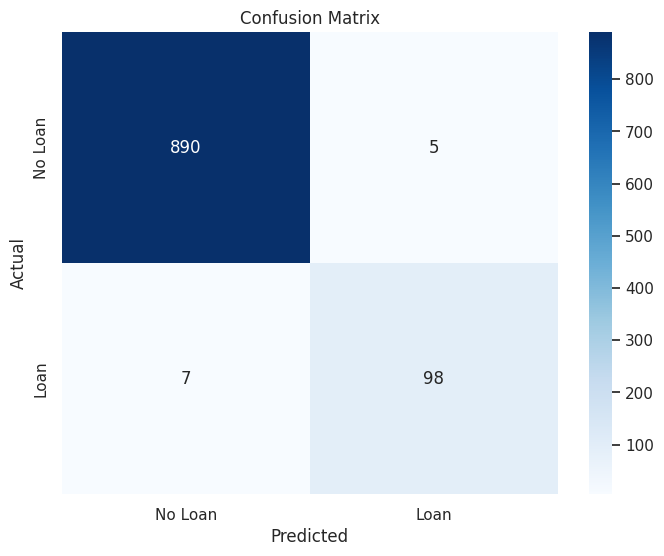

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini",random_state=42)  # Using "gini" criterion for the model

# Train the model
dt_model.fit(X_train, y_train)

# Model name
model_name = "Decision Tree (Original)"  # Or any name you want to give

# Evaluate the model
performance = model_performance_classification_sklearn(dt_model, X_train, X_test, y_train, y_test, model_name)

# Create a DataFrame
df_results = pd.DataFrame([performance])

print(df_results.T)

# Plot confusion matrix
confusion_matrix_sklearn(dt_model, X_test, y_test)

**Observation:** The model performs perfectly on the training data but slightly worse on the test data. This indicates overfitting as the model has likely memorized patterns in the training data rather than generalizing.



**Visualize Decision Tree and Decision Rules**


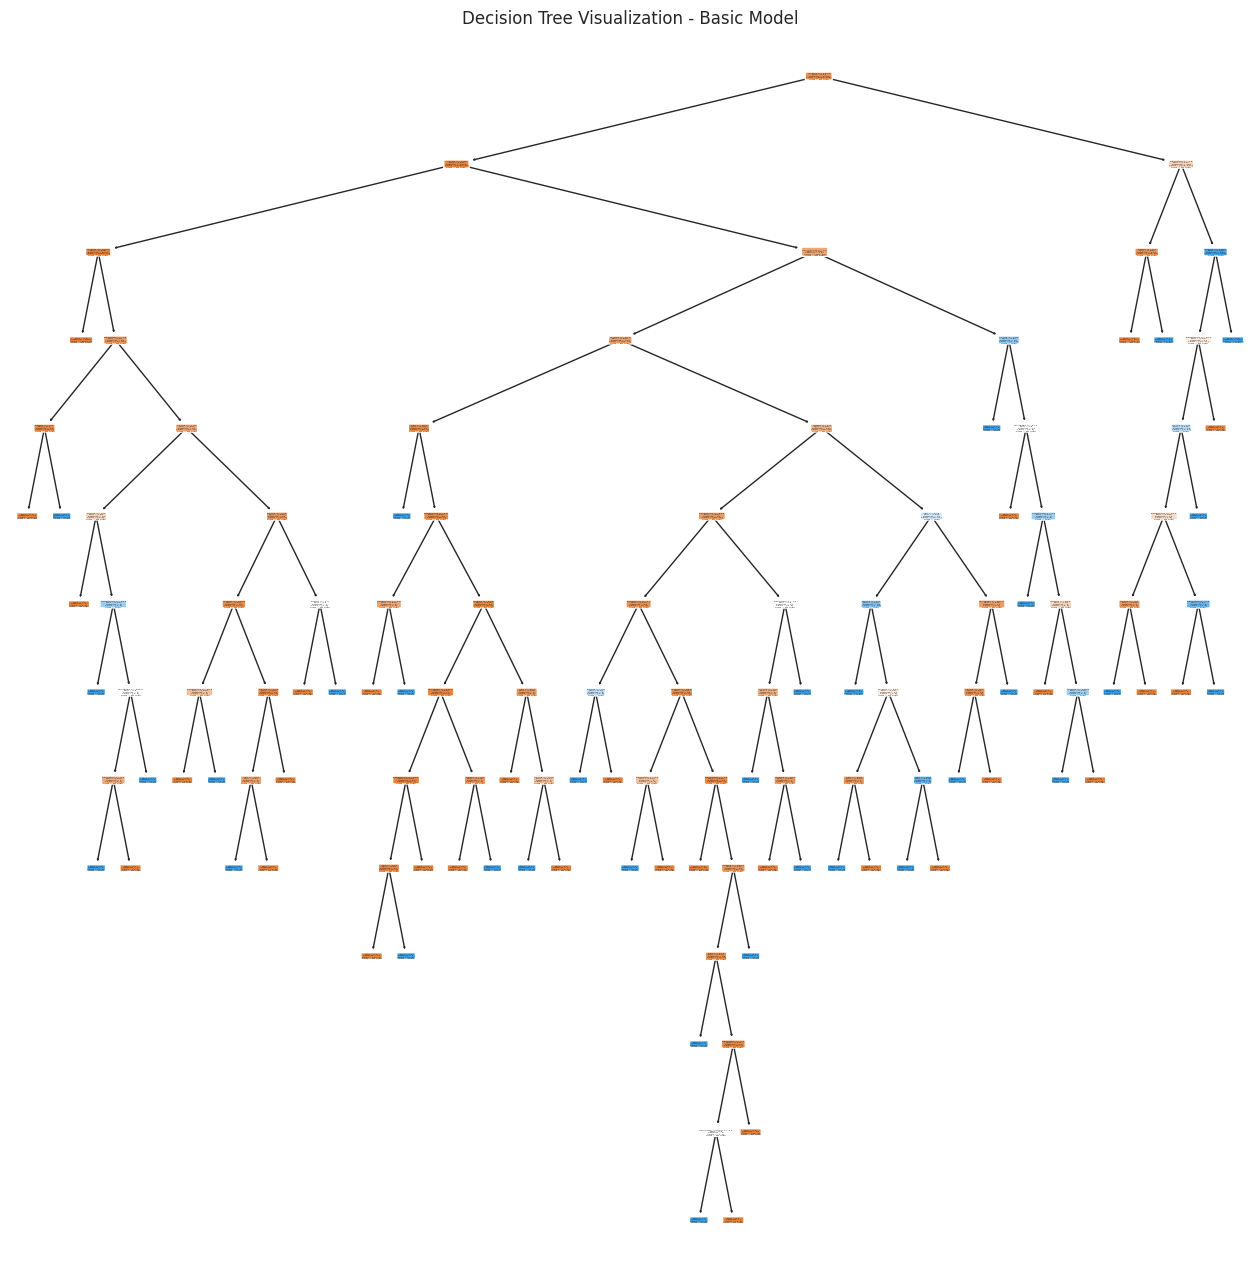

In [ ]:
# Plot the decision tree
plt.figure(figsize=(16, 16))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True, rounded=True)
plt.title("Decision Tree Visualization - Basic Model")
plt.show()


In [ ]:
# Get the decision rules
rules = export_text(dt_model, feature_names=list(X_train.columns))

print("Decision Tree Rules (Basic Model):")
print(rules)

Decision Tree Rules (Basic Model):
|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.65
|   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |--- Mortgage <= 206.00
|   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Mortgage >  206.00
|   |   |   |   |

**Feature Importance**

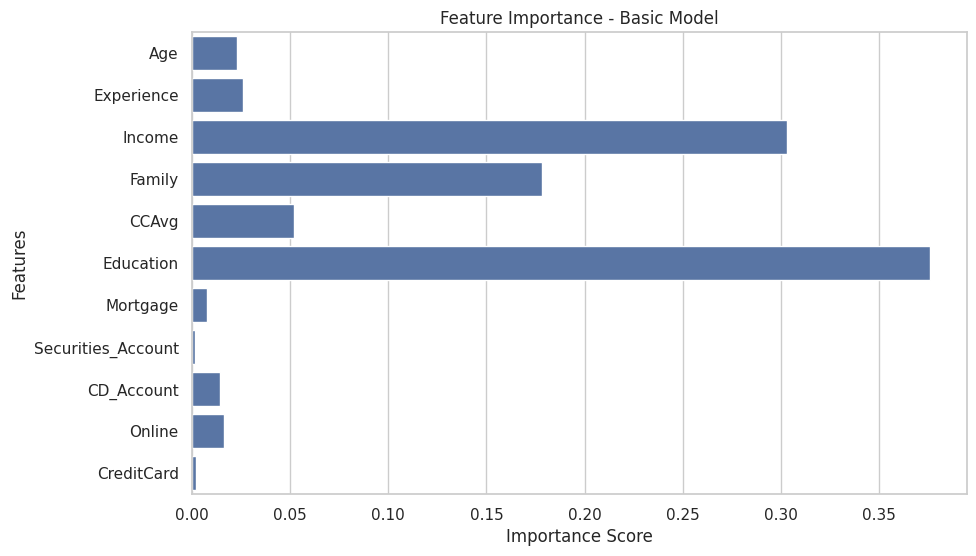

In [ ]:
# Get feature importances
importances = dt_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Basic Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


### Observations:

- Education and Income are the two most dominant features, with importance scores around 0.35
- Family is the third most important feature at around 0.2
- Shows a more distributed importance across features, with even smaller factors like Age, Experience, and CCAvg having notable contributions
- All 11 features have some level of importance, suggesting the model uses a broad range of indicators


## Model Performance Improvement

#### **Pre-Pruned Model in Decision Trees**

**Pre-Pruned Model and its Evaluation**



**Pre-Pruning** is a technique used to limit the growth of a decision tree during its creation. By restricting the tree’s size or complexity, pre-pruning helps prevent overfitting and ensures the tree generalizes well to unseen data. This is achieved by setting specific stopping criteria, such as the maximum depth of the tree, the minimum number of samples required to split a node, or the maximum number of leaf nodes.  

Below are the pre-pruning parameters we will use:  

**Hyperparameters**  

1. **`max_depth`**:  
   - Defines the maximum depth of the decision tree.  
   - A tree that grows too deep may overfit the training data, learning noise and specific patterns that don’t generalize to new data.  
   - Limiting the depth helps prevent overfitting and ensures better generalization.  

2. **`max_leaf_nodes`**:  
   - Restricts the maximum number of leaf nodes in the tree.  
   - A higher number of leaf nodes increases model complexity and may lead to overfitting. Limiting this parameter simplifies the model and reduces unnecessary complexity.  

3. **`min_samples_split`**:  
   - Specifies the minimum number of samples required to split an internal node.  
   - Increasing this value prevents the tree from learning overly specific patterns, ensuring it generalizes better and avoids overfitting.  

By leveraging pre-pruning techniques, we control the complexity of the tree and create a more robust model that balances bias and variance effectively.  

 **Hyperparameter Optimization Using Grid Search and Cross-Validation**  

**1. Grid Search**  
   - Systematically tests all possible combinations of parameter values you specify.  
   - Evaluates the model’s performance on each combination and identifies the best set of hyperparameters based on a chosen metric (in this case, **recall**).  

**2. Cross-Validation**  
   - During Grid Search, Cross-Validation splits the data into multiple parts (folds).  
   - The model is trained on a subset of the data and validated on the remaining portion for each fold, ensuring robust evaluation of the model's ability to generalize to unseen data.  

 **How the Grid Search Setup Works**  

- **`param_grid`**: Specifies the range of hyperparameters to tune. For example:  
  - 'max_depth': [None, 2, 3, 4, 5, 7]
  - 'max_leaf_nodes': [10, 20, 30, 40, None]
  - 'min_samples_split': [2, 5, 10, 20, 30]
  - 'min_samples_leaf': [1,2,5,10]  

- **`GridSearchCV`**:  
  - Performs a 5-fold cross-validation (`cv=5`), splitting the data into 5 parts and training/testing on each fold.  
  - Optimizes for recall by setting `scoring='recall'`.  
  - Utilizes all CPU cores (`n_jobs=-1`) to speed up the process.  

**Process Workflow**  

1. **Fitting the Grid Search**:  
   - `grid_search.fit(X_train, y_train)`: Trains the model with all combinations of parameters defined in `param_grid`.  

2. **Retrieving the Best Model**:  
   - `grid_search.best_params_`: Extracts the hyperparameter combination with the highest recall.  
   - `grid_search.best_estimator_`: Retrieves the trained model with these optimal parameters.  

  



In [ ]:
# Define parameter grid for Grid Search
param_grid = {
 'max_depth': [None, 2, 3, 4, 5, 7],
    'max_leaf_nodes': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1,2,5,10]
}

# Initialize the Decision Tree Classifier
dt1_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt1_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Parameters: {'max_depth': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


3. **Model Evaluation**:  



                                0
Model            Pre-Pruned Model
Train_Accuracy            0.78375
Train_Precision          0.302419
Train_Recall                  1.0
Train_F1-Score           0.464396
Test_Accuracy                 0.8
Test_Precision           0.344262
Test_Recall                   1.0
Test_F1-Score            0.512195


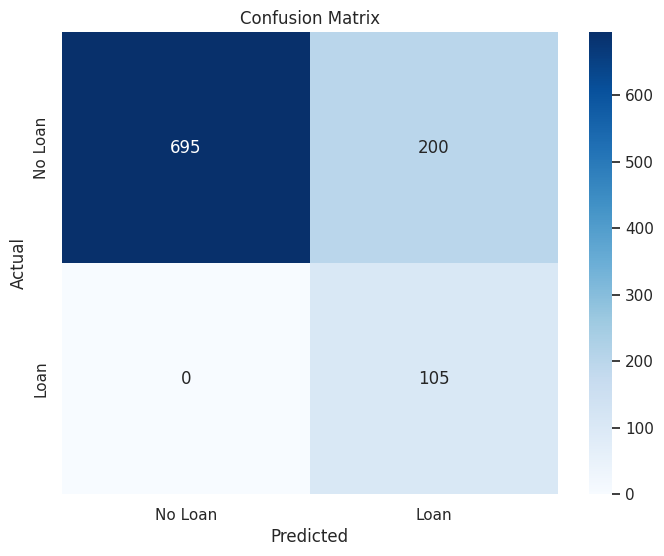

In [ ]:
# Evaluate the model
model_name = "Pre-Pruned Model"
performance = model_performance_classification_sklearn(best_model, X_train, X_test, y_train, y_test, model_name)

# Create a DataFrame
df_results = pd.DataFrame([performance])

print(df_results.T)

# Plot confusion matrix
confusion_matrix_sklearn(best_model, X_test, y_test)

**Observation:** Pre-pruning successfully reduces overfitting but significantly impacts the model’s precision and F1-Score. While the recall remains perfect (the model identifies all positives), it has a high false positive rate, leading to low precision. The test accuracy slightly improves compared to the training accuracy, indicating better generalization.


4. **Visualize Decision Tree and Decision Rules**


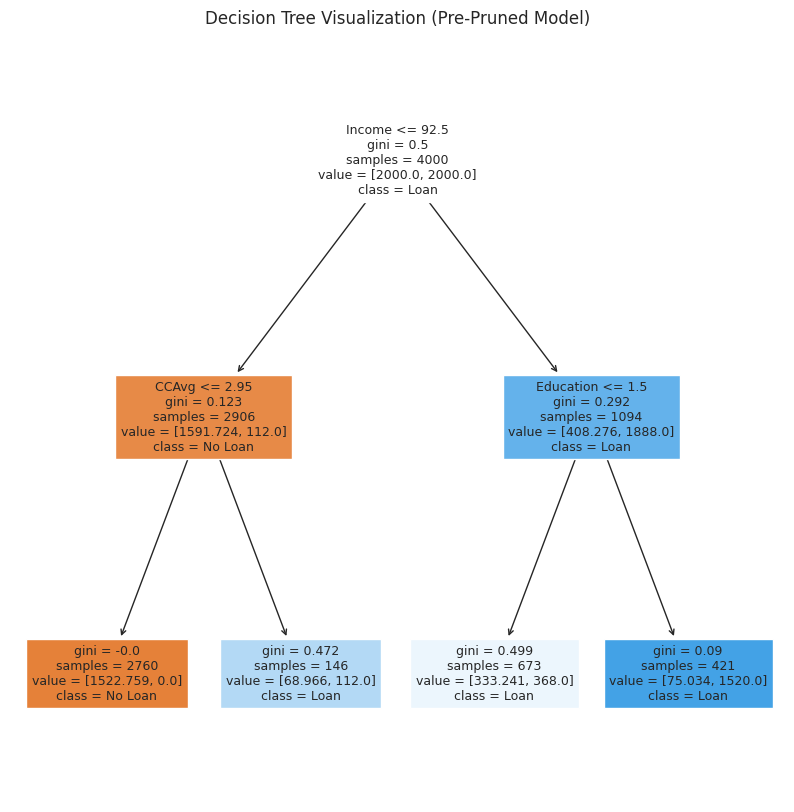

In [ ]:
# Visualizing the Decision Tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=["No Loan", "Loan"], fontsize=9)
plt.title("Decision Tree Visualization (Pre-Pruned Model)")
plt.show()

In [ ]:
# Showing the rules of a decision tree
tree_rules = export_text(best_model, feature_names=X_train.columns)
print("Decision Tree Rules Pre-Pruned Model:")
print(tree_rules)

Decision Tree Rules Pre-Pruned Model:
|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- class: 1



5. **Feature Importance**

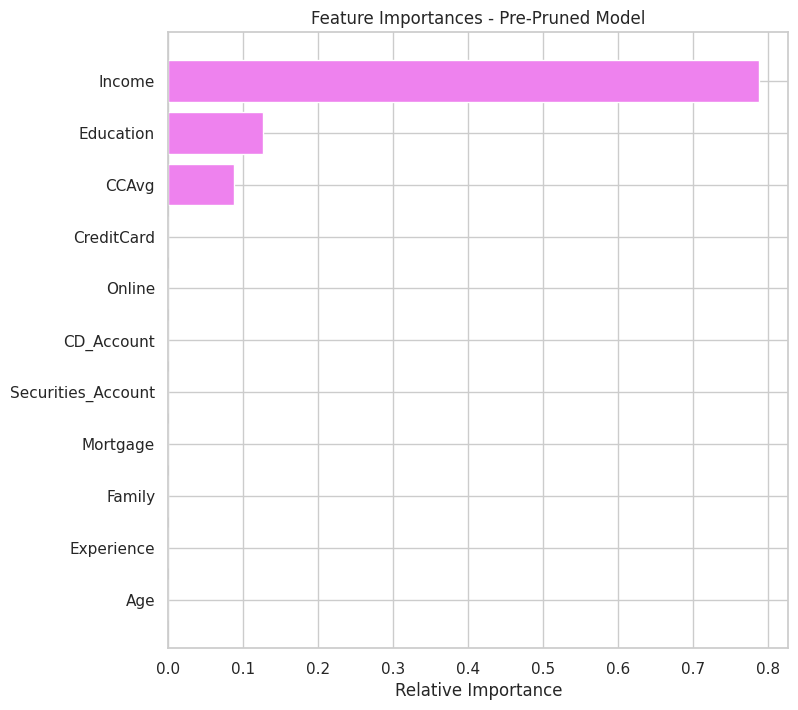

In [ ]:
# Displaying feature importances
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances - Pre-Pruned Model")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:

- Income is overwhelmingly dominant with a relative importance of nearly 0.8
- Only Education and CCAvg show meaningful importance besides Income
- Many features (like Mortgage, Securities_Account, Family, Experience, Age) have been effectively eliminated
- Shows a much more concentrated feature distribution focused on just 3 main variables

#### **Post-Pruning in Decision Trees**  



**Post-Pruned Model and its Evaluation**

**Post-pruning** helps solve this by removing branches that don’t significantly improve the model’s performance. The cost-complexity pruning path is used to find the best value of alpha (α), which controls how much pruning to apply.

By pruning the tree at the right level, we reduce its complexity, preventing overfitting while maintaining its predictive power on unseen data. The pruned tree is then evaluated using metrics like recall to select the best model.

This results in a simpler, more robust model that generalizes better to new customers in the loan prediction scenario.

In [ ]:
# Initialize the model and calculate the cost-complexity pruning path
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Define the range of ccp_alpha values to explore
ccp_alpha_range = np.logspace(-3, 0, 20)

best_recall = -1
best_precision = -1
best_f1 = -1
best_accuracy = -1  # Initialize best accuracy

best_ccp_alpha_recall = None
best_ccp_alpha_precision = None
best_ccp_alpha_f1 = None
best_ccp_alpha_accuracy = None  # Store alpha for best accuracy

best_model_recall = None
best_model_precision = None
best_model_f1 = None
best_model_accuracy = None  # Store model for best accuracy


recalls = []
precisions = []
f1s = []
accuracies = []
alpha_values = []

for ccp_alpha in ccp_alpha_range:
    print(f"Trying ccp_alpha: {ccp_alpha:.6f}")  # Print the current alpha

    dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    dt_clf.fit(X_train, y_train)  # Fit on the entire training set

    y_pred_test = dt_clf.predict(X_test)  # Predict on the test set

    current_recall = recall_score(y_test, y_pred_test)
    current_precision = precision_score(y_test, y_pred_test)
    current_f1 = f1_score(y_test, y_pred_test)
    current_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"Recall (Test): {current_recall:.4f}")  # Print recall for this alpha
    print(f"Precision (Test): {current_precision:.4f}")  # Print precision for this alpha
    print(f"F1-Score (Test): {current_f1:.4f}")  # Print F1-Score for this alpha
    print(f"Accuracy (Test): {current_accuracy:.4f}")  # Print accuracy for this alpha


    recalls.append(current_recall)
    precisions.append(current_precision)
    f1s.append(current_f1)
    accuracies.append(current_accuracy)
    alpha_values.append(ccp_alpha)

    if current_recall > best_recall:
        best_recall = current_recall
        best_ccp_alpha_recall = ccp_alpha
        best_model_recall = dt_clf

    if current_precision > best_precision:
        best_precision = current_precision
        best_ccp_alpha_precision = ccp_alpha
        best_model_precision = dt_clf

    if current_f1 > best_f1:
        best_f1 = current_f1
        best_ccp_alpha_f1 = ccp_alpha
        best_model_f1 = dt_clf

    if current_accuracy > best_accuracy:  # Update best accuracy
        best_accuracy = current_accuracy
        best_ccp_alpha_accuracy = ccp_alpha
        best_model_accuracy = dt_clf

print("\n--- Best Models Found ---")
print(f"Best Recall: {best_recall:.4f} (ccp_alpha: {best_ccp_alpha_recall})")
print(f"Best Precision: {best_precision:.4f} (ccp_alpha: {best_ccp_alpha_precision})")
print(f"Best F1-Score: {best_f1:.4f} (ccp_alpha: {best_ccp_alpha_f1})")
print(f"Best Accuracy: {best_accuracy:.4f} (ccp_alpha: {best_ccp_alpha_accuracy})") # Print best accuracy

Trying ccp_alpha: 0.001000
Recall (Test): 0.9048
Precision (Test): 0.9596
F1-Score (Test): 0.9314
Accuracy (Test): 0.9860
Trying ccp_alpha: 0.001438
Recall (Test): 0.9143
Precision (Test): 0.9412
F1-Score (Test): 0.9275
Accuracy (Test): 0.9850
Trying ccp_alpha: 0.002069
Recall (Test): 0.8857
Precision (Test): 1.0000
F1-Score (Test): 0.9394
Accuracy (Test): 0.9880
Trying ccp_alpha: 0.002976
Recall (Test): 0.8286
Precision (Test): 1.0000
F1-Score (Test): 0.9062
Accuracy (Test): 0.9820
Trying ccp_alpha: 0.004281
Recall (Test): 0.8476
Precision (Test): 0.9570
F1-Score (Test): 0.8990
Accuracy (Test): 0.9800
Trying ccp_alpha: 0.006158
Recall (Test): 0.8476
Precision (Test): 0.9570
F1-Score (Test): 0.8990
Accuracy (Test): 0.9800
Trying ccp_alpha: 0.008859
Recall (Test): 0.8476
Precision (Test): 0.9570
F1-Score (Test): 0.8990
Accuracy (Test): 0.9800
Trying ccp_alpha: 0.012743
Recall (Test): 0.8476
Precision (Test): 0.9570
F1-Score (Test): 0.8990
Accuracy (Test): 0.9800
Trying ccp_alpha: 0.0183

**Observations:**

**•	ccp_alpha: 0.002069**

•	Recall (Test): 0.8857

•	Precision (Test): 1.0000

•	F1-Score (Test): 0.9394

•	Accuracy (Test): 0.9880

**•	ccp_alpha: 0.001438**

•	Recall (Test): 0.9143

•	Precision (Test): 0.9412

•	F1-Score (Test): 0.9275

•	Accuracy (Test): 0.9850



The model trained with ccp_alpha = 0.001438 demonstrates a good balance between training and test performance, with high accuracy (around 0.98), good precision (around 0.94), and reasonable recall (around 0.90). This suggests good generalization and an ability to identify a substantial portion of potential loan customers. While a higher ccp_alpha (0.002976) yielded perfect precision, it came at the cost of significantly reduced recall (0.83).

**Conclusion:**

Considering AllLife Bank's objective to expand its loan customer base while managing marketing costs, the model with ccp_alpha = 0.001438 offers the most suitable balance.  The slightly lower precision is an acceptable trade-off for the significantly higher recall, allowing the bank to capture a larger share of potential loan customers without excessively increasing marketing waste.  Therefore, ccp_alpha = 0.001438 is the chosen parameter for the final model.


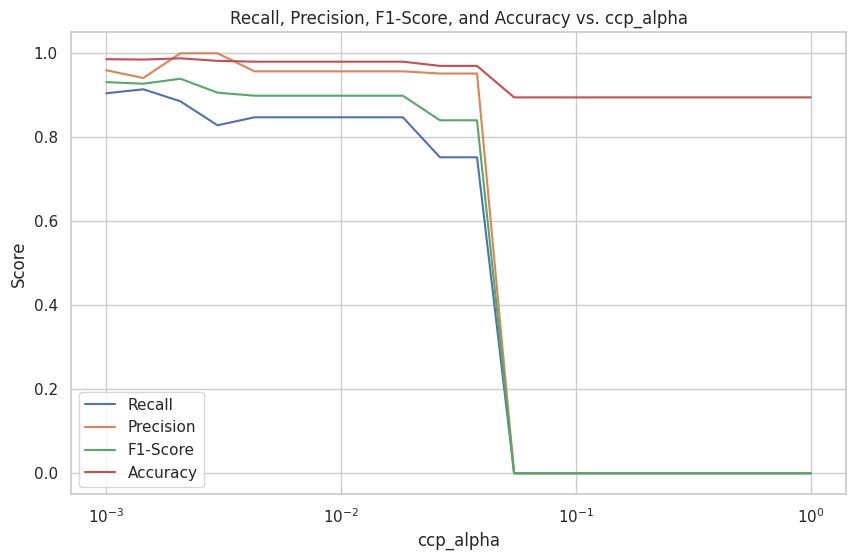

In [ ]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, recalls, label='Recall')
plt.plot(alpha_values, precisions, label='Precision')
plt.plot(alpha_values, f1s, label='F1-Score')
plt.plot(alpha_values, accuracies, label='Accuracy')  # Plot accuracy

plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.title('Recall, Precision, F1-Score, and Accuracy vs. ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

**Recall** is prioritized in this problem because the bank’s goal is to identify as many potential loan customers as possible. High recall ensures fewer missed opportunities (false negatives), which is crucial for expanding the loan customer base. While **precision** is important, maximizing it could lead to missing loan customers. **Accuracy** isn't ideal for imbalanced datasets, as it may mask the true performance of the model. Ultimately, recall aligns with the bank's objective of capturing more loan customers, even if it means tolerating some false positives.

In [ ]:
best_recall = -1  # Initialize with a value that will be easily surpassed (for recall)
best_ccp_alpha = None
best_model1 = None

# Iterate through ccp_alpha values and evaluate on the test set DIRECTLY
for ccp_alpha in ccp_alpha_range:
    print(f"Trying ccp_alpha: {ccp_alpha:.6f}")  # Print the current alpha

    dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    dt_clf.fit(X_train, y_train)  # Fit on the entire training set

    y_pred_test = dt_clf.predict(X_test)  # Predict on the test set

    current_recall = recall_score(y_test, y_pred_test)  # Calculate recall on the test set

    print(f"Recall (Test): {current_recall:.4f}")  # Print recall for this alpha

    if current_recall > best_recall:  # Compare with best recall
        best_recall = current_recall
        best_ccp_alpha = ccp_alpha
        best_model1 = dt_clf  # Store the best model so far

print("\n--- Best Model Found ---")
print("Best ccp_alpha:", best_ccp_alpha)

# Train the final model on ALL training data (using the best alpha)
final_dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
final_dt_clf.fit(X_train, y_train)

Trying ccp_alpha: 0.001000
Recall (Test): 0.9048
Trying ccp_alpha: 0.001438
Recall (Test): 0.9143
Trying ccp_alpha: 0.002069
Recall (Test): 0.8857
Trying ccp_alpha: 0.002976
Recall (Test): 0.8286
Trying ccp_alpha: 0.004281
Recall (Test): 0.8476
Trying ccp_alpha: 0.006158
Recall (Test): 0.8476
Trying ccp_alpha: 0.008859
Recall (Test): 0.8476
Trying ccp_alpha: 0.012743
Recall (Test): 0.8476
Trying ccp_alpha: 0.018330
Recall (Test): 0.8476
Trying ccp_alpha: 0.026367
Recall (Test): 0.7524
Trying ccp_alpha: 0.037927
Recall (Test): 0.7524
Trying ccp_alpha: 0.054556
Recall (Test): 0.0000
Trying ccp_alpha: 0.078476
Recall (Test): 0.0000
Trying ccp_alpha: 0.112884
Recall (Test): 0.0000
Trying ccp_alpha: 0.162378
Recall (Test): 0.0000
Trying ccp_alpha: 0.233572
Recall (Test): 0.0000
Trying ccp_alpha: 0.335982
Recall (Test): 0.0000
Trying ccp_alpha: 0.483293
Recall (Test): 0.0000
Trying ccp_alpha: 0.695193
Recall (Test): 0.0000
Trying ccp_alpha: 1.000000
Recall (Test): 0.0000

--- Best Model Foun

DecisionTreeClassifier(ccp_alpha=0.0014384498882876629, random_state=42)

                                 0
Model            Post-Pruned Model
Train_Accuracy              0.9835
Train_Precision           0.937677
Train_Recall              0.882667
Train_F1-Score            0.909341
Test_Accuracy                0.985
Test_Precision            0.941176
Test_Recall               0.914286
Test_F1-Score             0.927536


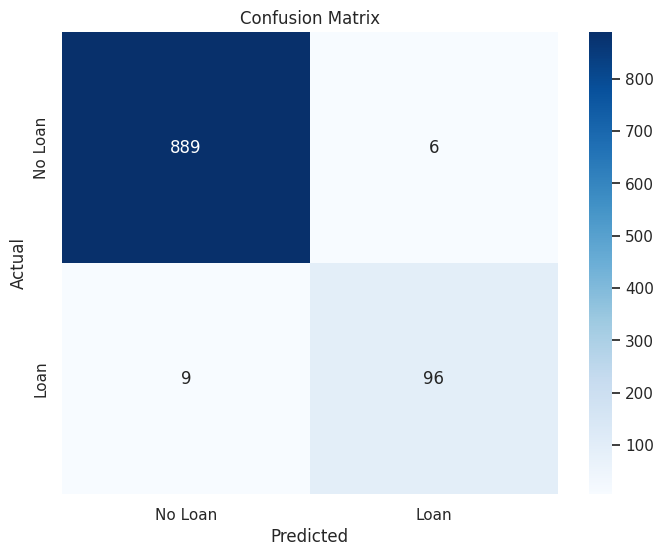

In [ ]:
# Evaluate the model on the training and test data using recall score
model_name = "Post-Pruned Model"

performance = model_performance_classification_sklearn(final_dt_clf, X_train, X_test, y_train, y_test, model_name)

# Create a DataFrame directly from the single model's performance dictionary
df_results = pd.DataFrame([performance])

print(df_results.T)

# Plot confusion matrix
confusion_matrix_sklearn(final_dt_clf, X_test, y_test)

 **Visualize Decision Tree and Decision Rules**


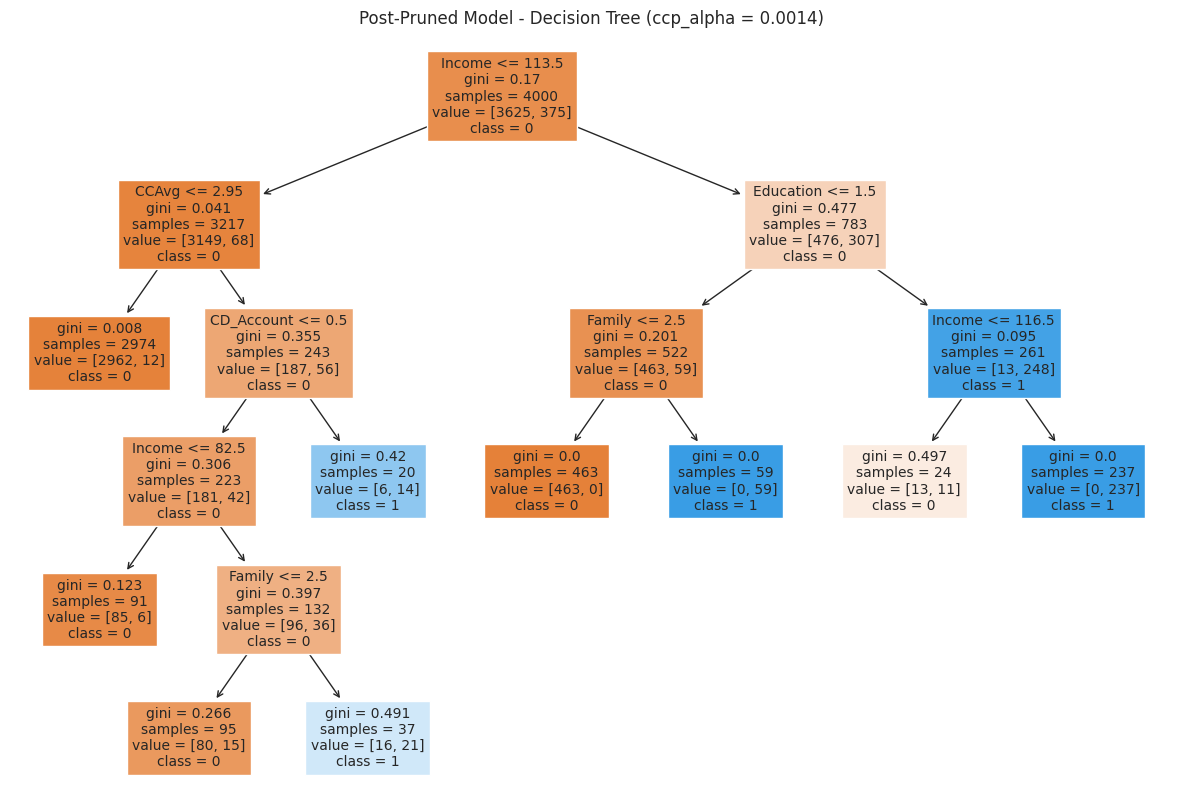

In [ ]:
# The final pruned tree
plt.figure(figsize=(15, 10))
plot_tree(final_dt_clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=10)
plt.title(f"Post-Pruned Model - Decision Tree (ccp_alpha = {best_ccp_alpha:.4f})")
plt.show()

In [ ]:
# Get the decision rules
rules = export_text(final_dt_clf, feature_names=list(X_train.columns))

print("Decision Tree Rules (Post-Pruning):")
print(rules)

Decision Tree Rules (Post-Pruning):
|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- class: 0
|   |   |--- Income >  116.50
|   |   |   |--- class: 1



**Feature importances**

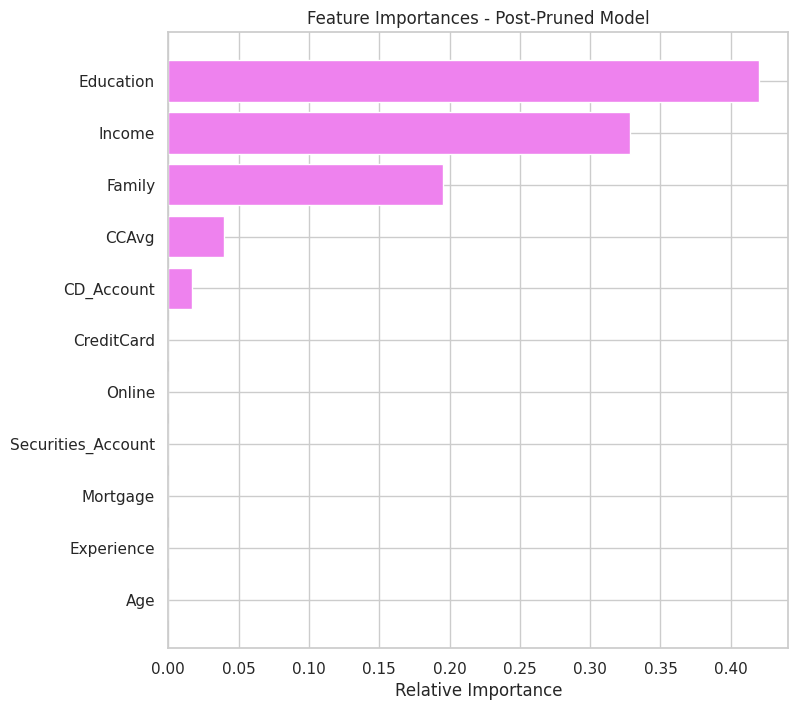

In [ ]:
# Feature importances
feature_importances = final_dt_clf.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances - Post-Pruned Model")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations:

- Education is now the most important feature (0.4), followed by Income (0.35)
- Family maintains moderate importance (0.2)
- CCAvg and CD_Account have minimal importance
- Most other features have been pruned away
- Shows a balanced distribution between the top features while eliminating noise

## Model Performance Comparison and Final Model Selection

In [ ]:
# 1. Evaluate models and store metrics
models = {
    "Decision Tree (Original)": dt_model,
    "Decision Tree (Pre-Pruning)": best_model,
    "Decision Tree (Post-Pruning)": final_dt_clf,

}

results_list = []

for model_name, model in models.items():
    performance = model_performance_classification_sklearn(model, X_train, X_test, y_train, y_test, model_name)
    results_list.append(performance)

# 2. Create DataFrame
df_results = pd.DataFrame(results_list)

print(df_results)

# 3. Check for Overfitting (Perfect 1.0 Scores) and Exclude
overfit_models = []

for index, row in df_results.iterrows():
    overfit_train = (
        row["Train_Accuracy"] == 1.0
        or row["Train_Precision"] == 1.0
        or row["Train_Recall"] == 1.0
        or row["Train_F1-Score"] == 1.0
    )
    overfit_test = (
        row["Test_Accuracy"] == 1.0
        or row["Test_Precision"] == 1.0
        or row["Test_Recall"] == 1.0
        or row["Test_F1-Score"] == 1.0
    )

    if overfit_train or overfit_test:  # Check EITHER train OR test
        overfit_models.append(row["Model"])
        print(f"Warning: Model '{row['Model']}' appears to be overfitting (perfect 1.0 score on {'train and/or test' if overfit_train and overfit_test else 'train' if overfit_train else 'test'} set). Excluding from final selection.")

# Filter out overfit models:
df_results = df_results[~df_results["Model"].isin(overfit_models)]

# 4. Overall Best Model Selection
overall_best_model = None
overall_best_score = -1
overall_best_metric = None

def evaluate_model(row):
    # criteria: prioritize Test F1-Score, then Test Accuracy, then Test Recall
    if row["Test_F1-Score"] > 0.90:
        return row["Test_F1-Score"]
    elif row["Test_Accuracy"] > 0.90:
        return row["Test_Accuracy"]
    elif row["Test_Recall"] > 0.90:
        return row["Test_Recall"]
    return -1

for _, row in df_results.iterrows():
    score = evaluate_model(row)
    if score > overall_best_score:
        overall_best_score = score
        overall_best_model = row["Model"]
        overall_best_metric = "Custom Evaluation (F1 > 0.90, Accuracy > 0.90, Recall > 0.90)"

print(f"\nOverall Best Model (based on {overall_best_metric}): {overall_best_model} (Score: {overall_best_score:.4f})")

# 5. Display Results (DataFrame Comparison) - Showing Train and Test
print("\nModel Comparison:")
print(df_results)


# 6. Compare Train and Test Metrics for the Best Model
if overall_best_model:  # Check if a best model was selected
    best_model_row = df_results[df_results["Model"] == overall_best_model].iloc[0] # Get the row corresponding to the best model
    print("\nTrain vs. Test Metrics for the Best Model:")
    print(f"Model: {overall_best_model}")
    print(f"Train Accuracy: {best_model_row['Train_Accuracy']:.4f}")
    print(f"Test Accuracy: {best_model_row['Test_Accuracy']:.4f}")
    print(f"Train Precision: {best_model_row['Train_Precision']:.4f}")
    print(f"Test Precision: {best_model_row['Test_Precision']:.4f}")
    print(f"Train Recall: {best_model_row['Train_Recall']:.4f}")
    print(f"Test Recall: {best_model_row['Test_Recall']:.4f}")
    print(f"Train F1-Score: {best_model_row['Train_F1-Score']:.4f}")
    print(f"Test F1-Score: {best_model_row['Test_F1-Score']:.4f}")
else:
    print("\nNo suitable model found after excluding overfitting models.")

                          Model  Train_Accuracy  Train_Precision  \
0      Decision Tree (Original)         1.00000         1.000000   
1   Decision Tree (Pre-Pruning)         0.78375         0.302419   
2  Decision Tree (Post-Pruning)         0.98350         0.937677   

   Train_Recall  Train_F1-Score  Test_Accuracy  Test_Precision  Test_Recall  \
0      1.000000        1.000000          0.988        0.951456     0.933333   
1      1.000000        0.464396          0.800        0.344262     1.000000   
2      0.882667        0.909341          0.985        0.941176     0.914286   

   Test_F1-Score  
0       0.942308  
1       0.512195  
2       0.927536  

Overall Best Model (based on Custom Evaluation (F1 > 0.90, Accuracy > 0.90, Recall > 0.90)): Decision Tree (Post-Pruning) (Score: 0.9275)

Model Comparison:
                          Model  Train_Accuracy  Train_Precision  \
2  Decision Tree (Post-Pruning)          0.9835         0.937677   

   Train_Recall  Train_F1-Score  Test_A

### Observations:

The output reveals a trade-off between model complexity and how well the model generalizes to new data:

*   **Original Decision Tree:**
    *   Perfect training scores (Accuracy, Precision, Recall, F1-score all 1.0) indicate severe overfitting.
    *   While showing the highest test scores *numerically*, this performance is likely inflated due to memorization and won't generalize well to unseen data, posing a risk of misclassifying new loan applicants for AllLife Bank.

*   **Pre-Pruned Decision Tree:**
    *   Significantly lower performance across all metrics on both training and test sets.
    *   Perfect test recall is achieved at the cost of extremely low precision, classifying nearly all applicants as potential loan customers – a highly inefficient and costly strategy for the bank.

*   **Post-Pruned Decision Tree:**
    *   Balances training and test performance, suggesting better generalization.
    *   Avoids the extreme overfitting of the original tree.
    *   Substantially better performance than the pre-pruned model, capturing more underlying patterns without memorizing noise.
    *   Offers a reasonable balance of precision and recall, crucial for AllLife Bank's objective of identifying potential loan customers while managing marketing expenses.

Given the bank's need for a model that performs well on unseen data and the risks associated with overfitting, the **post-pruned decision tree** is the most suitable option.


## Actionable Insights and Business Recommendations


### **Actionable Insights**  
1. **Income Levels**:  
   - Customers with income ≤ 113.50 are less likely to purchase personal loans unless their credit card average (CCAvg) exceeds 2.95 and they hold a certificate of deposit (CD) account or have a family size > 2.5.  
   - Customers with income > 113.50 are more likely to convert, particularly if they have higher education (Education > 1.5) and income > 116.50, or a family size > 2.5.  

2. **Credit Card Usage (CCAvg)**:  
   - Customers with lower CCAvg (≤ 2.95) rarely convert unless income and family size thresholds are exceeded.  
   - A higher CCAvg (> 2.95) significantly increases the likelihood of conversion, especially if paired with a CD account or larger families.  

3. **Family Size**:  
   - Family size plays a critical role in conversion. Larger families (Family > 2.5) are more likely to convert, provided their income and other financial attributes align.  

4. **Education**:  
   - Customers with higher education (Education > 1.5) are more likely to convert, especially when income is > 116.50. Lower education customers (≤ 1.5) with a family size ≤ 2.5 are less likely to purchase loans.  

5. **CD Account Ownership**:  
   - Having a CD account significantly increases the likelihood of loan purchase, even for customers with income ≤ 113.50 or low CCAvg.  

---

### **Business Recommendations**  
1. **Target High-Income, High-Education Segments**:  
   - Focus on customers with income > 116.50 and Education > 1.5 as their likelihood of conversion is highest.  

2. **Leverage CD Account Holders**:  
   - Prioritize marketing efforts toward CD account holders, as they show a high likelihood of converting, even with moderate income or lower CCAvg.  

3. **Focus on Larger Families**:  
   - Develop campaigns targeted at larger families (Family > 2.5) with tailored messaging about financial stability and long-term security.  

4. **Segment by CCAvg**:  
   - Customers with CCAvg > 2.95 should be a key focus for campaigns. For those with lower CCAvg, highlight benefits of increased financial engagement and potential rewards for improving credit usage.  

5. **Optimize Marketing for Education Levels**:  
   - Tailor campaigns for customers with higher education (Education > 1.5) to emphasize personal loans as tools for achieving financial aspirations.  

6. **Incentivize Low-Income Customers with CD Accounts**:  
   - For lower-income customers, promote CD accounts as a pathway to personal loan eligibility, increasing their conversion potential.  

---

### **Summary**  
AllLife Bank should focus on high-income (>$116.50), high-education customers and prioritize families with more than 2.5 members. CD account holders, regardless of income, should be key targets due to their high conversion likelihood. Customers with higher credit card usage (CCAvg > 2.95) and active financial engagement also represent a strong opportunity for loan sales. By segmenting campaigns based on income, family size, CCAvg, education, and CD account ownership, the bank can enhance marketing efficiency and drive loan conversions effectively.

___